In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from binet_keras import get_tf_model
from utils import get_feature_labels, get_binetflow_files, get_saved_data, get_classifier, mask_features
from summarizer import Summarizer
from binet_keras import get_tf_model

/usr/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
def plot_roc_curve(clfname, feature, label, name, test_size=0.5):
    
    feature = mask_features(feature)
    feat_train, feat_test, label_train, label_test = train_test_split(
                    feature, label, test_size=test_size, random_state=42)
    
    if clfname == 'tf':
        model = get_tf_model(dimension=17)
        model.fit(feat_train, label_train, nb_epoch=10, batch_size=32, verbose=False)
        y_score = model.predict_proba(feat_test, batch_size=32, verbose=0)
        _, acc = model.evaluate(feat_test, label_test, batch_size=32, verbose=False)
        print(acc)
        fpr, tpr, _ = roc_curve(label_test, y_score[:])
    else:
        classifier = get_classifier(clfname)
        classifier.fit(feat_train, label_train)
        y_score = classifier.predict_proba(feat_test)
        predicted = classifier.predict(feat_test)
        print('accuracy:', accuracy_score(label_test, predicted))
        print('precision:', precision_score(label_test, predicted))
        print('recall:', recall_score(label_test, predicted))
        print('f1:', f1_score(label_test, predicted))    
        fpr, tpr, _ = roc_curve(label_test[:], y_score[:, 1])
        
    roc_auc = auc(fpr, tpr)

    # Plotting
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC area under curve = {0:.4f}'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend(loc='lower right')    
    names = {'tf': 'Deep Learning', 'rf': 'Random Forest', 'dt': 'Decision Trees'}
    plt.title('ROC for {} with {}'.format(name, names[clfname]))
    plt.show()

In [3]:
binet_files = get_binetflow_files()

saved_data/saved_0.15s_18.pk1
saved_data/saved_0.15s_17.pk1
saved_data/saved_0.15s_15-3.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9974654686871396


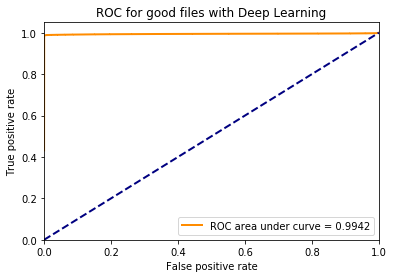

accuracy: 0.9935027490948103
precision: 0.9803548505409866
recall: 0.97534665207079
f1: 0.9778443387598317


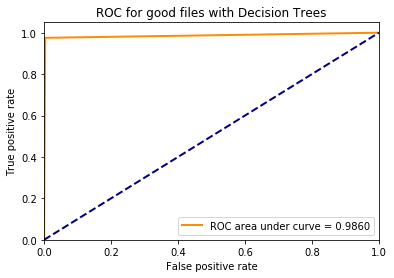

accuracy: 0.9956684993965401
precision: 0.993712005197457
recall: 0.976715015508119
f1: 0.9851402019644377


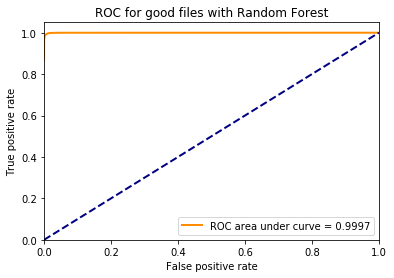

In [4]:
good_files = [9, 8, 12]
summaries = []
for b in good_files:
    summaries += get_saved_data(0.15, binet_files[b])
feature, label = get_feature_labels(summaries)
plot_roc_curve('tf', feature, label, 'good files')
plot_roc_curve('dt', feature, label, 'good files')
plot_roc_curve('rf', feature, label, 'good files')

saved_data/saved_0.15s_10.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9487699893753235


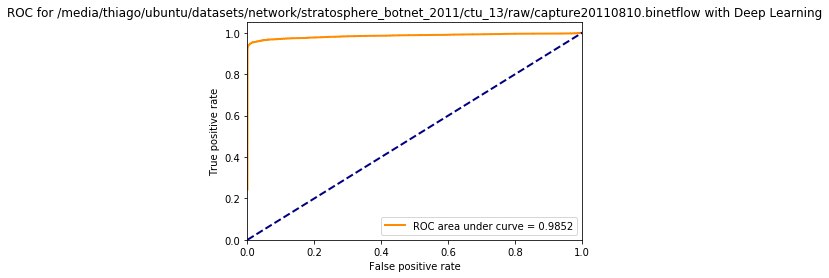

accuracy: 0.9862151633203476
precision: 0.927736910428386
recall: 0.9264006913437995
f1: 0.9270683194004036


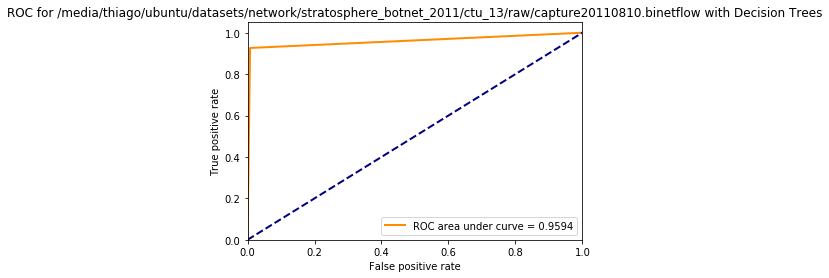

accuracy: 0.9896477511101425
precision: 0.9849411764705882
recall: 0.9043641077344088
f1: 0.9429343745307103


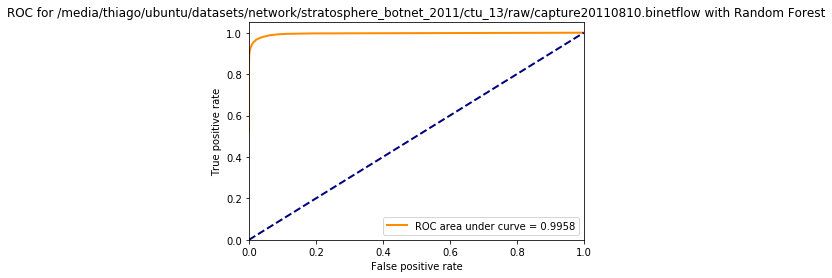

saved_data/saved_0.15s_11.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9317180616740088


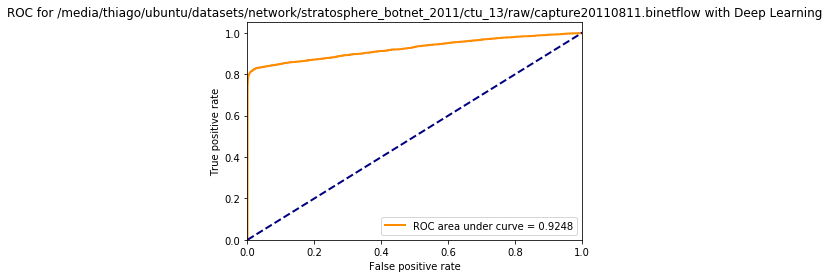

accuracy: 0.9849048215656954
precision: 0.9207330536542283
recall: 0.9148749451513822
f1: 0.9177946517002311


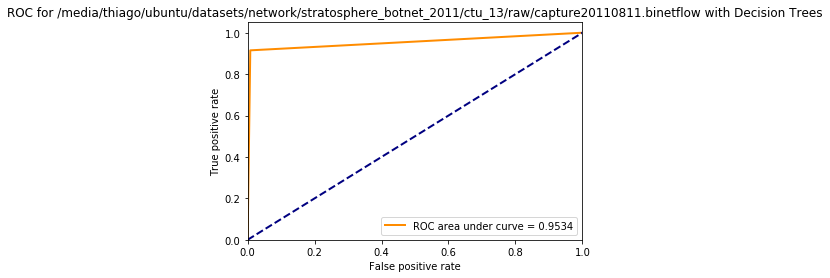

accuracy: 0.9883805520753345
precision: 0.9813874788494078
recall: 0.8907415533128565
f1: 0.9338700402530189


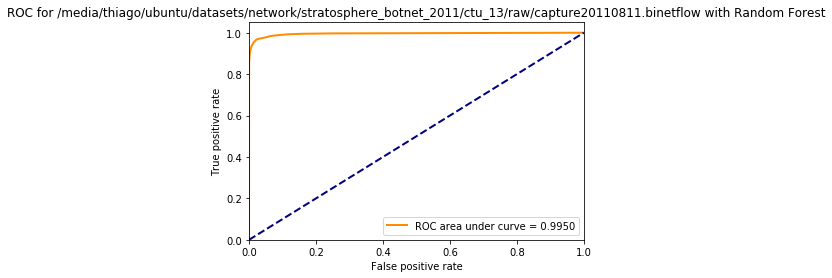

saved_data/saved_0.15s_12.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9896075474474033


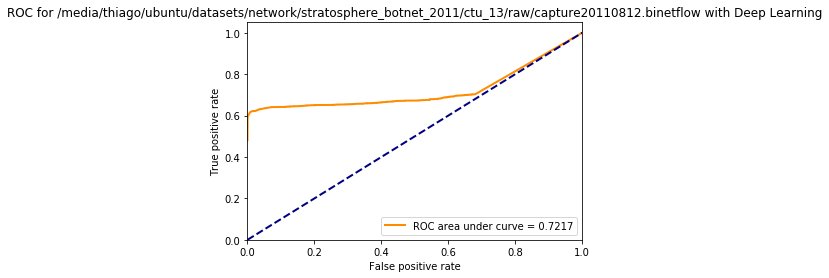

accuracy: 0.9983466970722378
precision: 0.9734301444187345
recall: 0.9556634811217296
f1: 0.9644649986165461


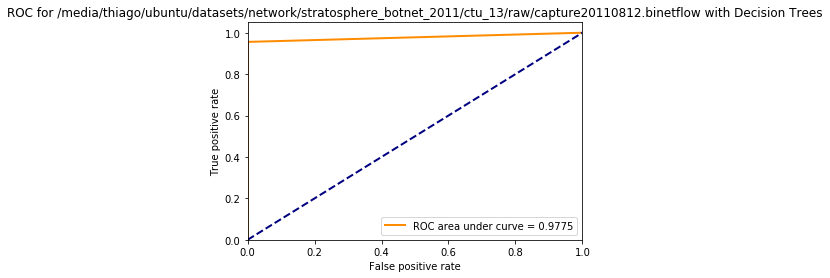

accuracy: 0.9985857731352067
precision: 0.9943139678615575
recall: 0.9451668494438352
f1: 0.9691177061162202


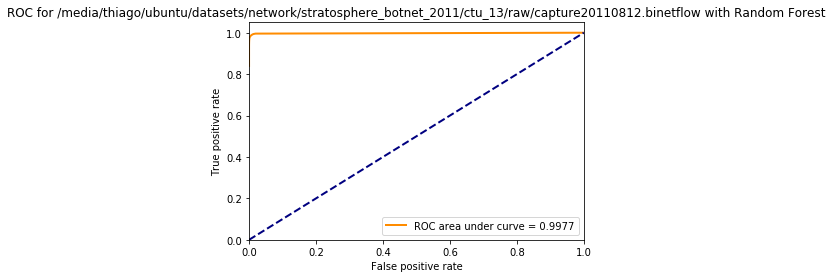

saved_data/saved_0.15s_15.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9844286144276111


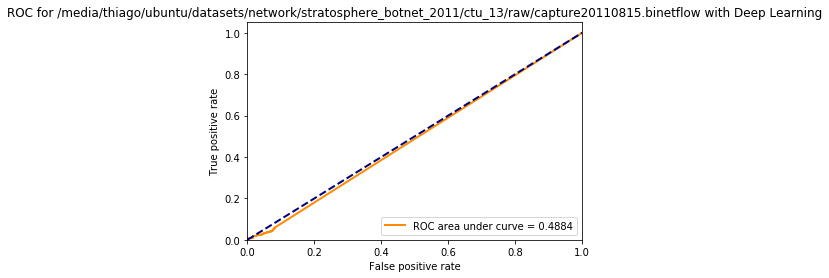

accuracy: 0.9903882813283836
precision: 0.7071129707112971
recall: 0.6533505154639175
f1: 0.6791694574681849


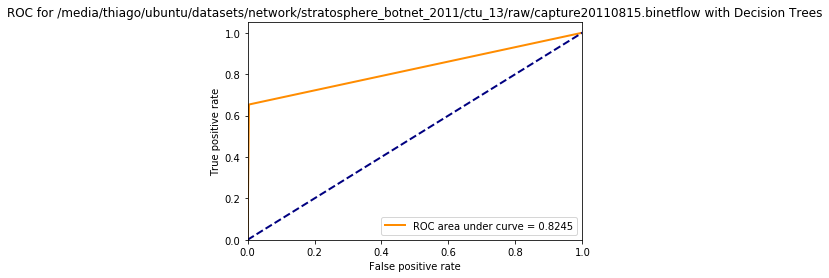

accuracy: 0.9910304003210595
precision: 0.9852507374631269
recall: 0.43041237113402064
f1: 0.5991031390134529


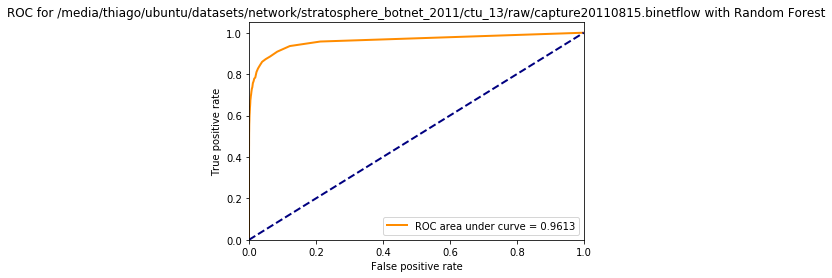

saved_data/saved_0.15s_15-2.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9330424567880516


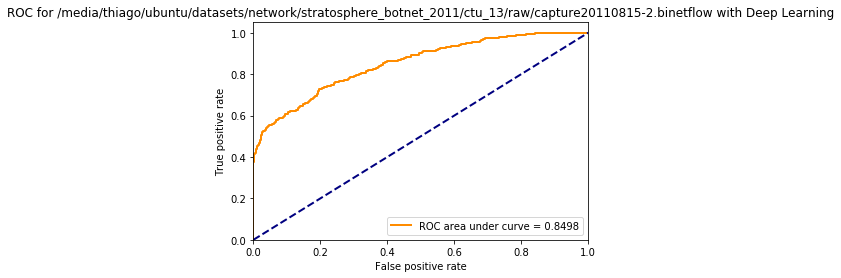

accuracy: 0.9622419869105555
precision: 0.7430167597765364
recall: 0.6666666666666666
f1: 0.702774108322325


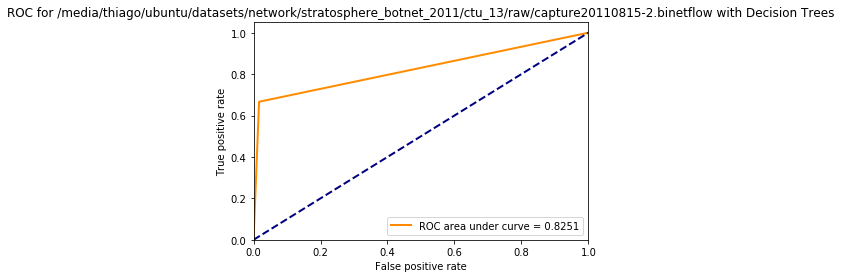

accuracy: 0.9686188957878838
precision: 0.9818181818181818
recall: 0.5413533834586466
f1: 0.6978998384491114


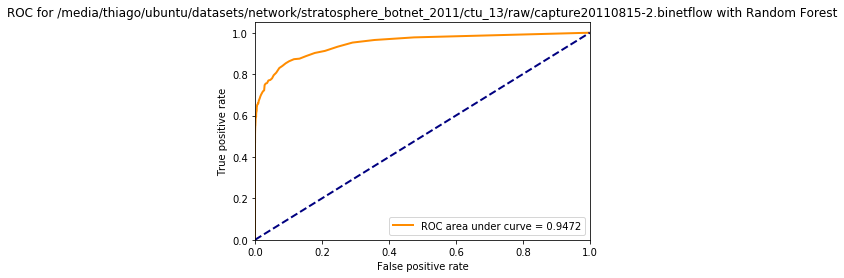

saved_data/saved_0.15s_16.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.987362965894501


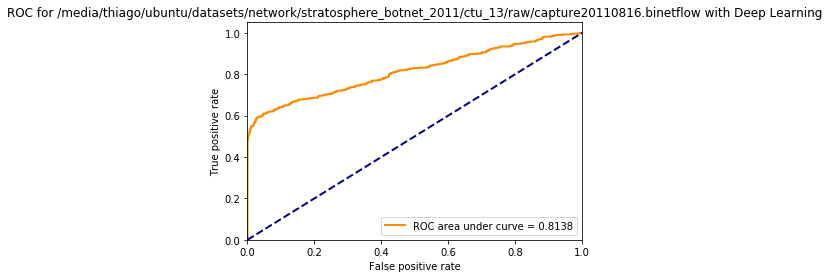

accuracy: 0.989276460035878
precision: 0.7409200968523002
recall: 0.6538461538461539
f1: 0.6946651532349601


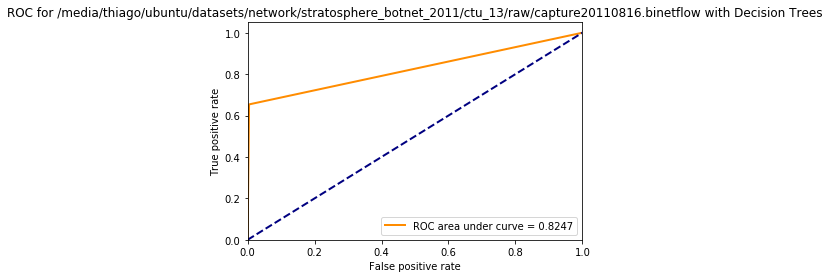

accuracy: 0.9921865656766993
precision: 1.0
recall: 0.5811965811965812
f1: 0.7351351351351351


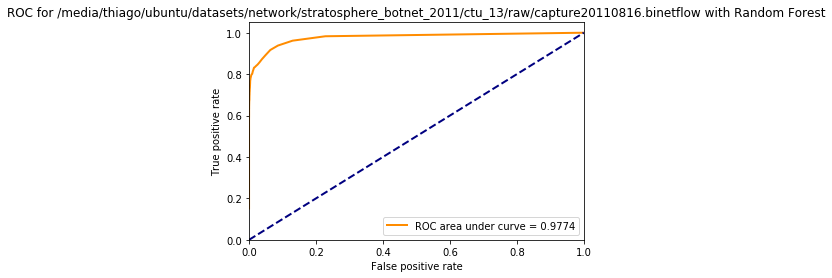

saved_data/saved_0.15s_16-2.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9968423609424338


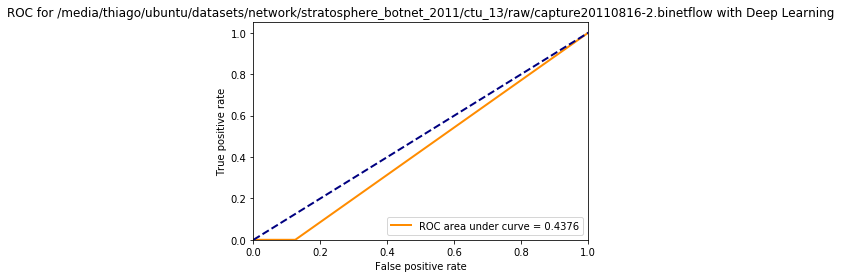

accuracy: 0.9929560359485062
precision: 0.0
recall: 0.0
f1: 0.0


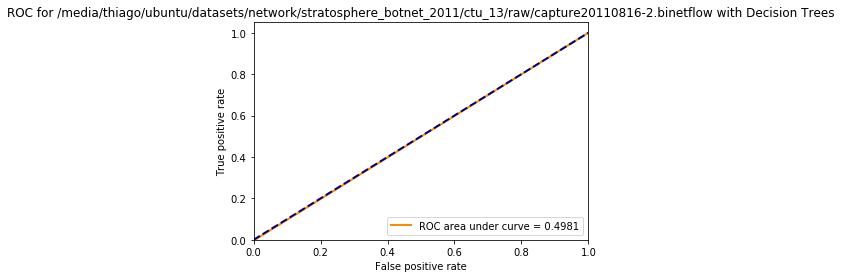

accuracy: 0.9968423609424338
precision: 0.0
recall: 0.0
f1: 0.0


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


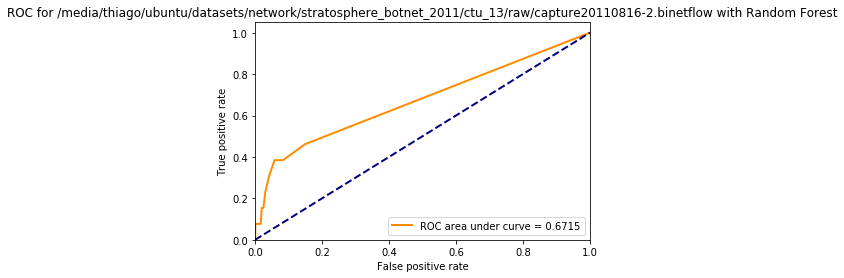

saved_data/saved_0.15s_16-3.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9932506518994924


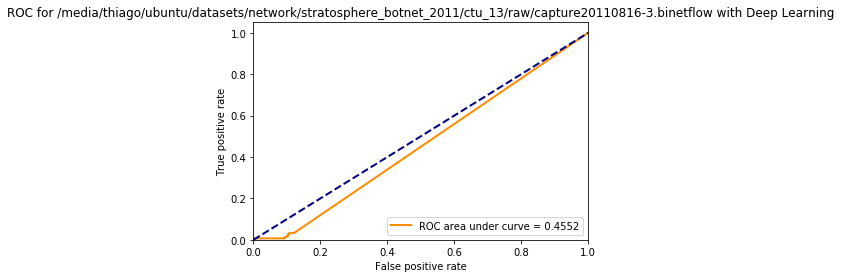

accuracy: 0.9982493158510628
precision: 0.8974358974358975
recall: 0.8361774744027304
f1: 0.8657243816254416


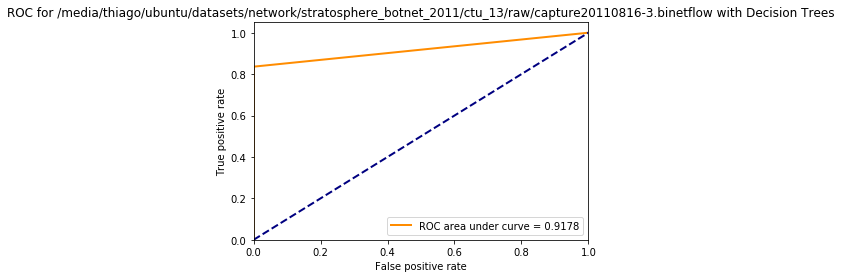

accuracy: 0.998382920694008
precision: 0.9964349376114082
recall: 0.7631399317406143
f1: 0.864321608040201


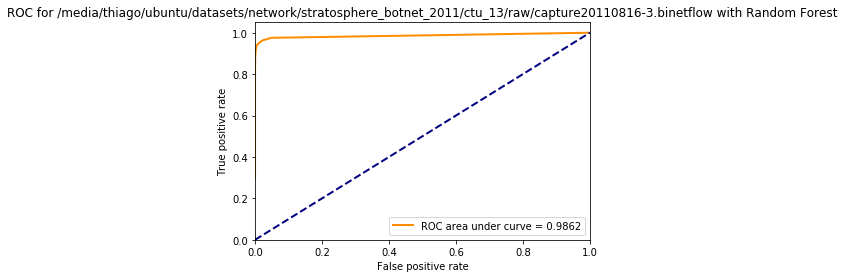

saved_data/saved_0.15s_17.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9789956542675418


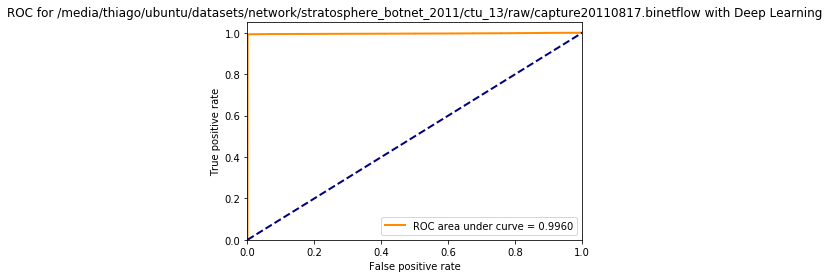

accuracy: 0.975309834218574
precision: 0.97061169152245
recall: 0.9682950115363195
f1: 0.9694519675003983


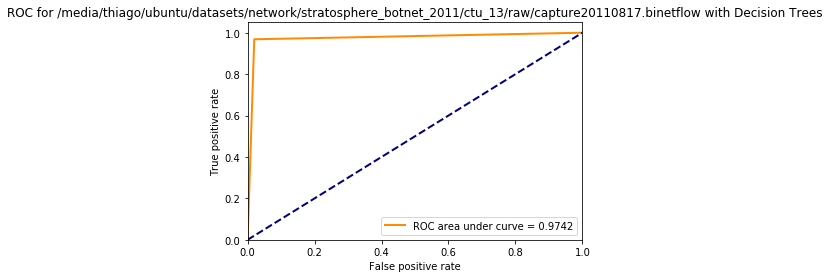

accuracy: 0.9804603251247385
precision: 0.9778683285394695
recall: 0.973744927997454
f1: 0.9758022722742674


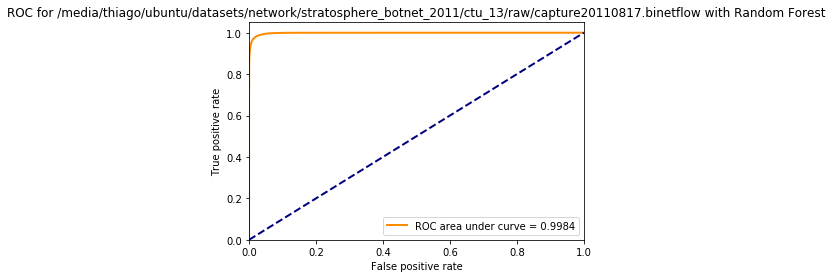

saved_data/saved_0.15s_18.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9888571742254768


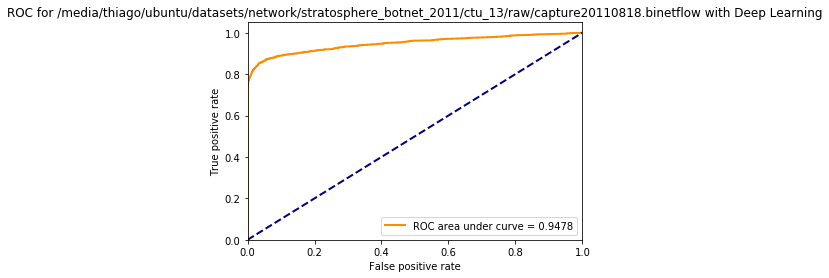

accuracy: 0.9902294434076189
precision: 0.8993223620522749
recall: 0.8507326007326007
f1: 0.8743529411764706


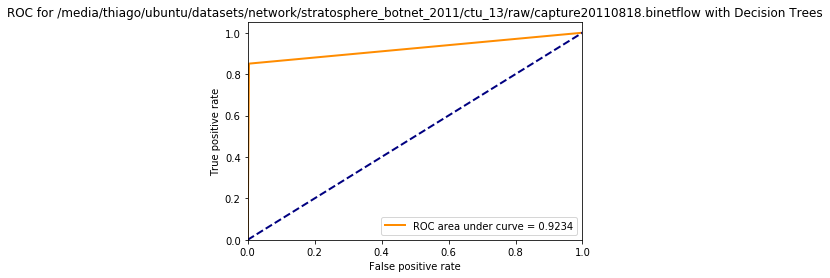

accuracy: 0.9926080433271124
precision: 0.9713983050847458
recall: 0.8397435897435898
f1: 0.900785854616896


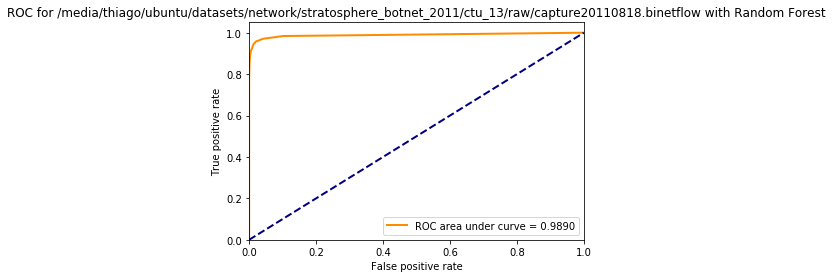

saved_data/saved_0.15s_18-2.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9764309761901496


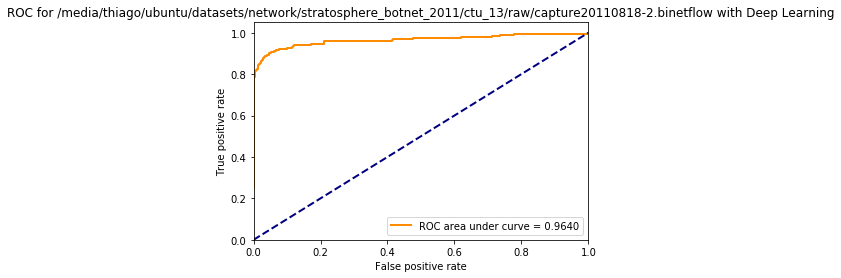

accuracy: 0.9703703703703703
precision: 0.8467741935483871
recall: 0.8076923076923077
f1: 0.8267716535433071


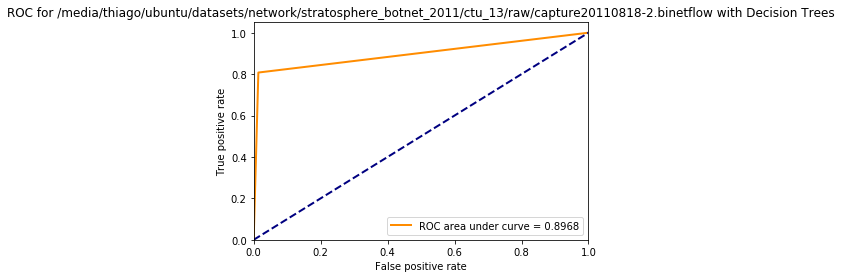

accuracy: 0.9808080808080808
precision: 0.9432314410480349
recall: 0.8307692307692308
f1: 0.8834355828220858


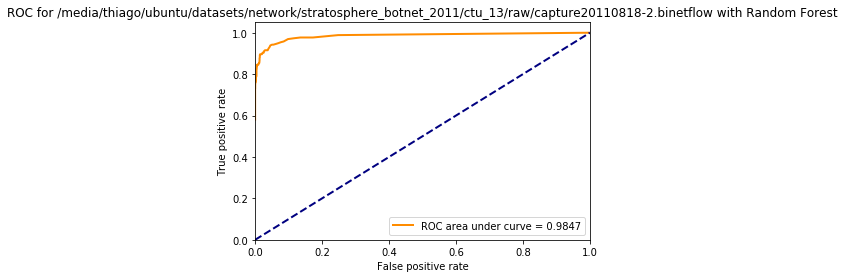

saved_data/saved_0.15s_19.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9665177036823379


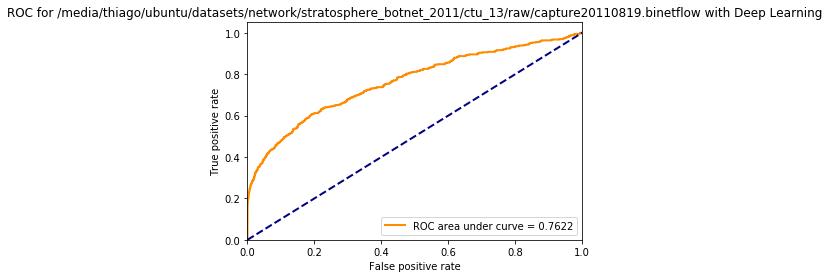

accuracy: 0.9866620831900997
precision: 0.8123667377398721
recall: 0.7823408624229979
f1: 0.7970711297071129


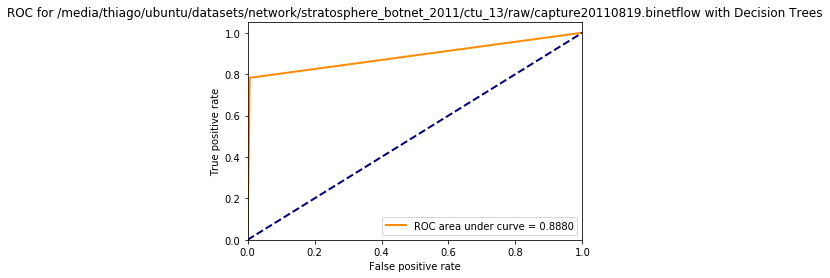

accuracy: 0.9836369886558955
precision: 0.9806949806949807
recall: 0.5215605749486653
f1: 0.680965147453083


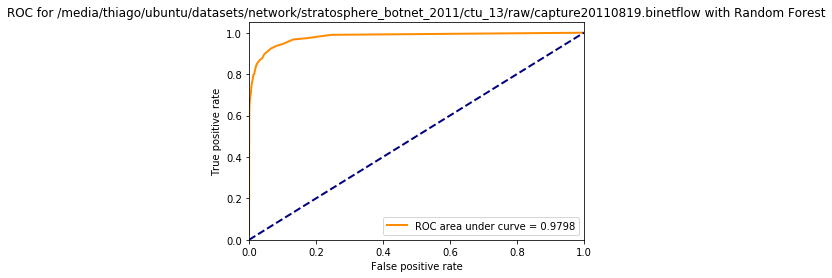

saved_data/saved_0.15s_15-3.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9911017812966606


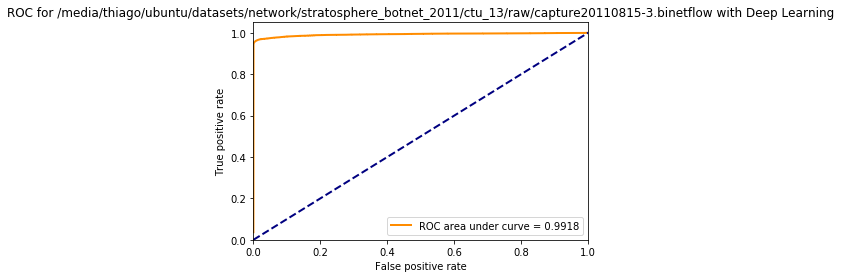

accuracy: 0.997834674953305
precision: 0.9899135446685879
recall: 0.9865374259558427
f1: 0.9882226018160568


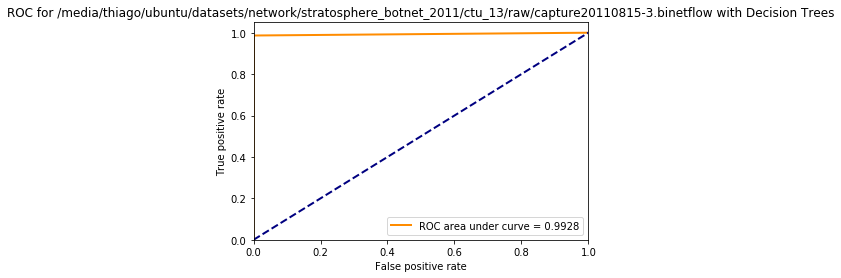

accuracy: 0.9982534146569916
precision: 0.9966077053549794
recall: 0.9843834141087776
f1: 0.9904578429306764


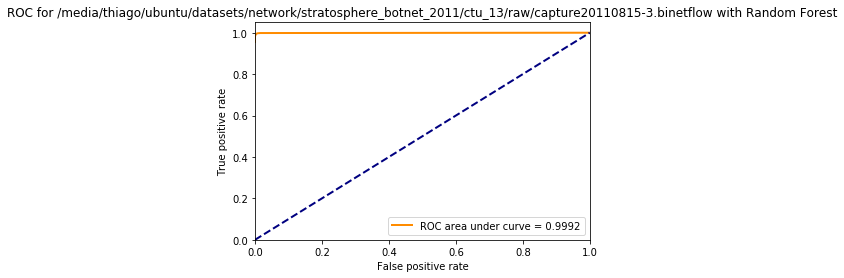

In [5]:
for binet in binet_files:
    feature, label = get_feature_labels(get_saved_data(0.15, binet))
    plot_roc_curve('tf', feature, label, binet)
    plot_roc_curve('dt', feature, label, binet)
    plot_roc_curve('rf', feature, label, binet)    

saved_data/saved_0.15s_10.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9671275170832482


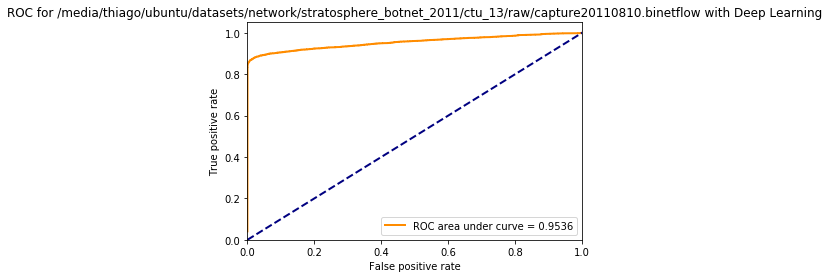

accuracy: 0.9890803423460237
precision: 0.9459524963645177
recall: 0.9379956741167988
f1: 0.941957282490648


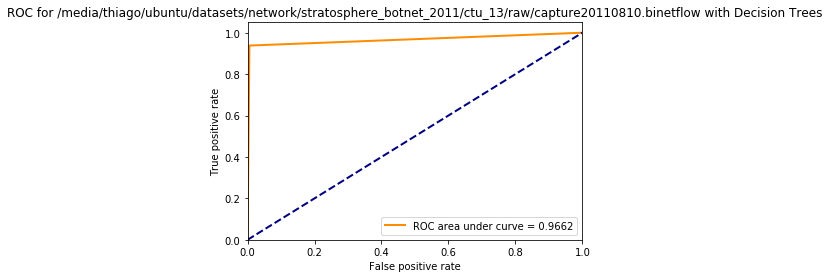

accuracy: 0.990919203614157
precision: 0.9880612509732676
recall: 0.9149242970439798
f1: 0.9500873471425006


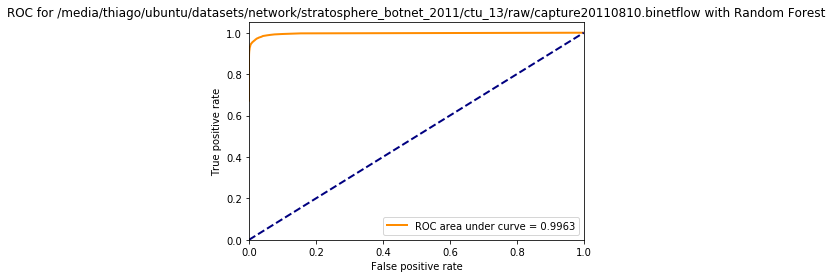

saved_data/saved_0.15s_11.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9645022228370214


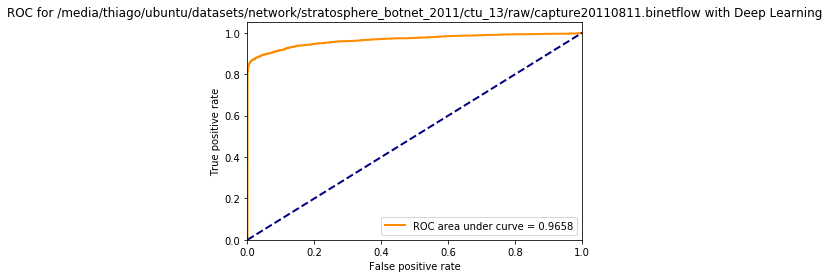

accuracy: 0.9898962683551125
precision: 0.9480471628592484
recall: 0.941800878477306
f1: 0.9449136981270658


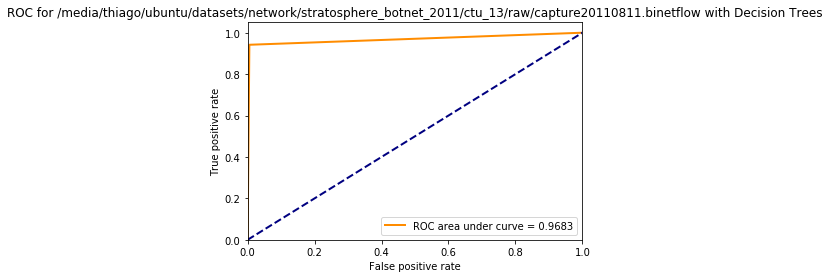

accuracy: 0.9905361713592887
precision: 0.9872763419483102
recall: 0.9088579795021962
f1: 0.946445587955022


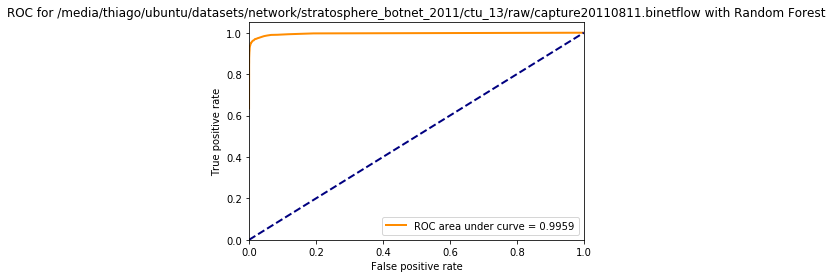

saved_data/saved_0.15s_12.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9909733460840567


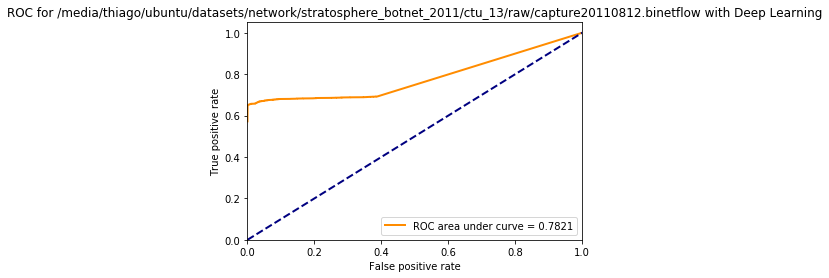

accuracy: 0.9984827865234662
precision: 0.9725303750660328
recall: 0.9624885635864593
f1: 0.967483413256257


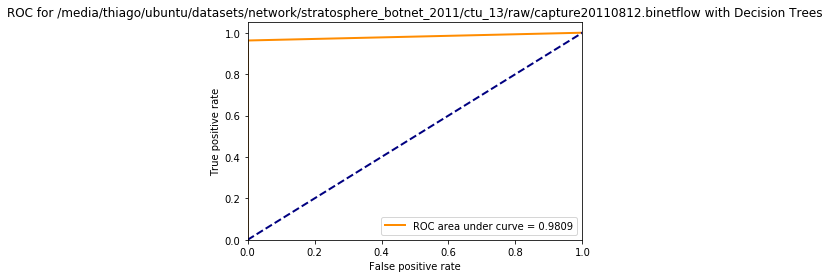

accuracy: 0.998868986317493
precision: 0.9940298507462687
recall: 0.9575218925630636
f1: 0.975434391851408


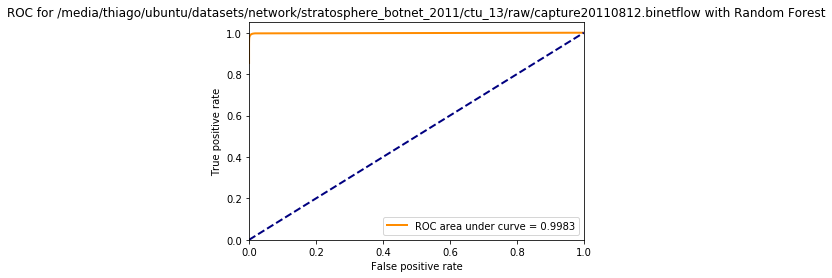

saved_data/saved_0.15s_15.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9844821243436674


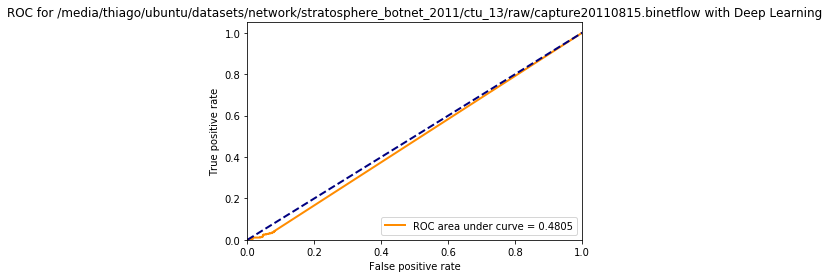

accuracy: 0.9907026520852146
precision: 0.7152777777777778
recall: 0.665948275862069
f1: 0.6897321428571429


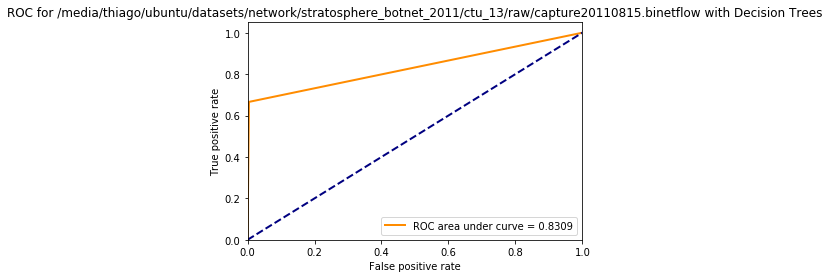

accuracy: 0.9937125848633825
precision: 1.0
recall: 0.5948275862068966
f1: 0.745945945945946


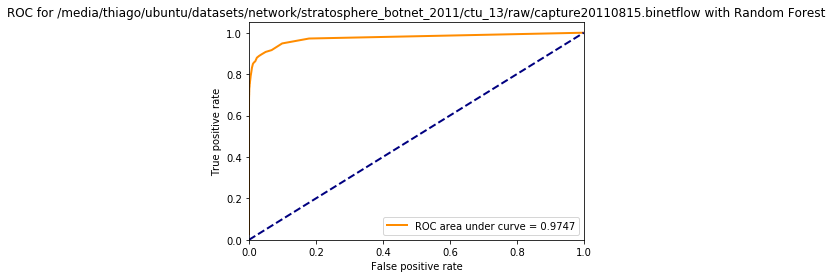

saved_data/saved_0.15s_15-2.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9309284117664534


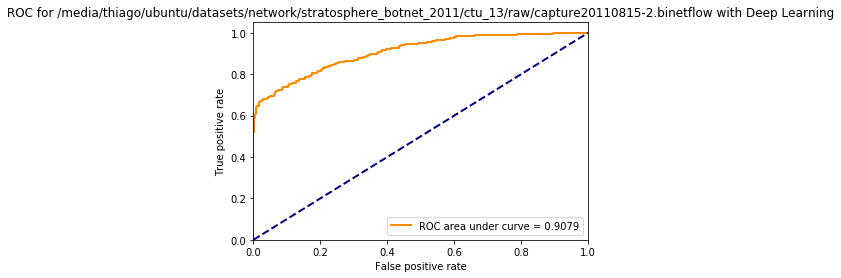

accuracy: 0.9580536912751678
precision: 0.7063829787234043
recall: 0.6720647773279352
f1: 0.6887966804979253


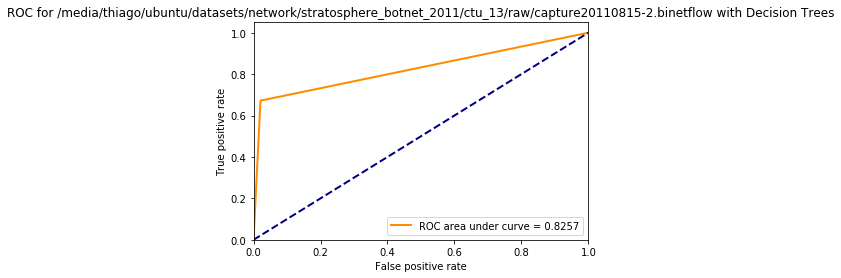

accuracy: 0.9689597315436241
precision: 0.9722222222222222
recall: 0.5668016194331984
f1: 0.7161125319693094


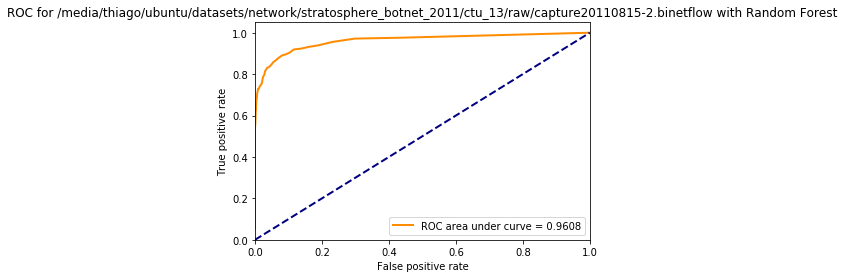

saved_data/saved_0.15s_16.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9894359178792107


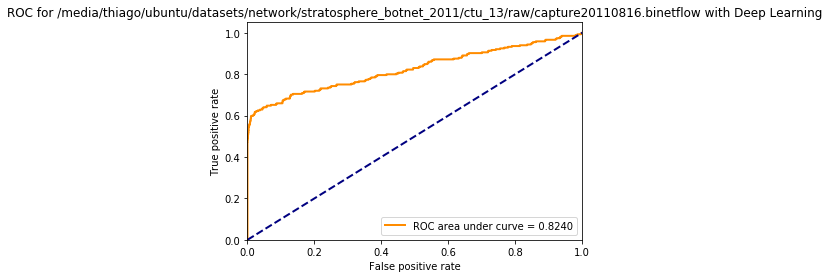

accuracy: 0.9900338847917082
precision: 0.7244094488188977
recall: 0.696969696969697
f1: 0.7104247104247104


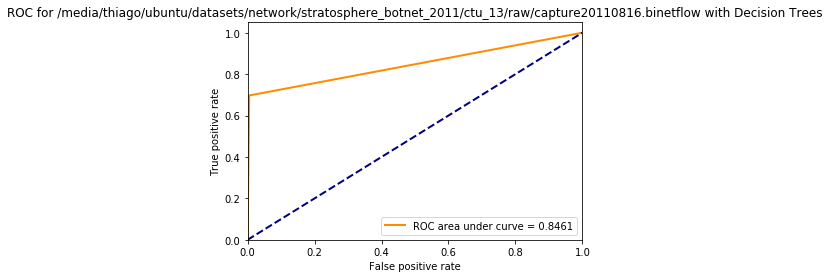

accuracy: 0.9928243970500299
precision: 0.9875
recall: 0.5984848484848485
f1: 0.7452830188679246


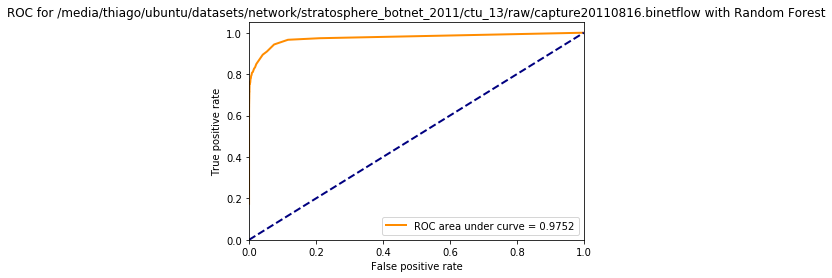

saved_data/saved_0.15s_16-2.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9967611336032388


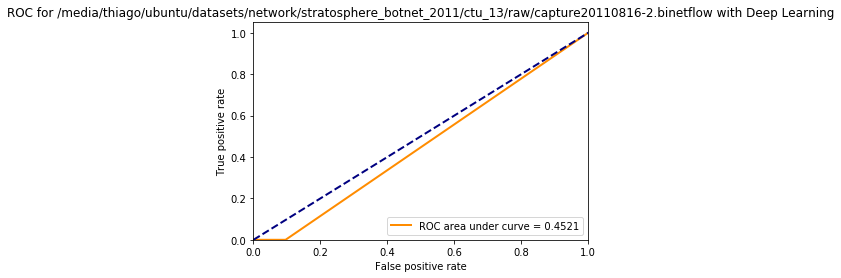

accuracy: 0.9959514170040485
precision: 0.0
recall: 0.0
f1: 0.0


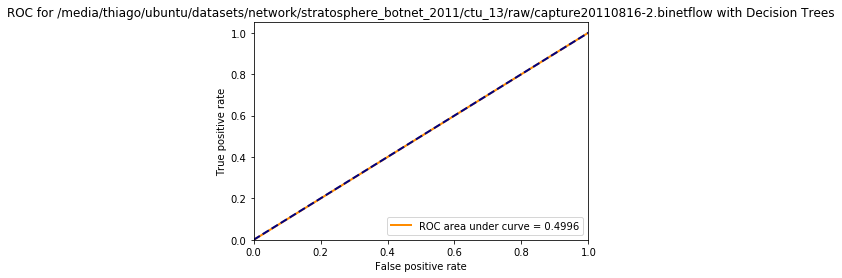

accuracy: 0.9967611336032388
precision: 0.0
recall: 0.0
f1: 0.0


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


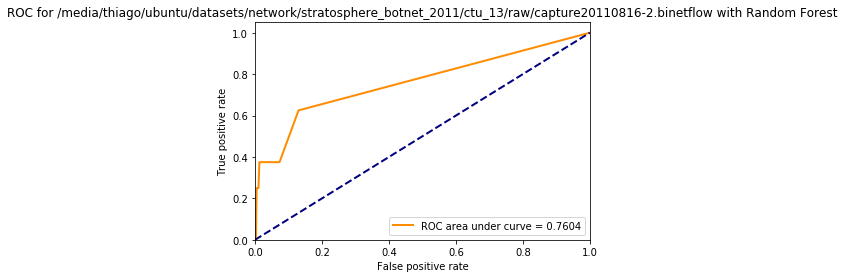

saved_data/saved_0.15s_16-3.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9932736975467424


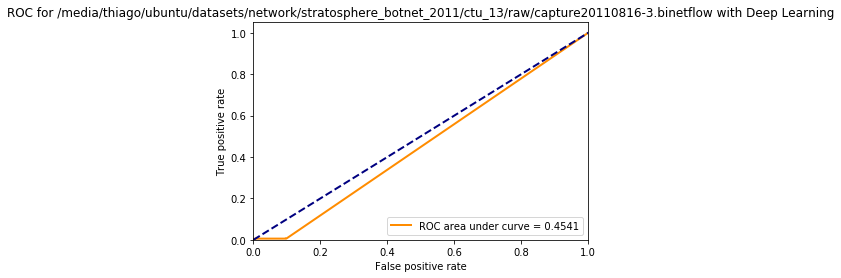

accuracy: 0.9984796713633048
precision: 0.8988235294117647
recall: 0.8721461187214612
f1: 0.8852838933951334


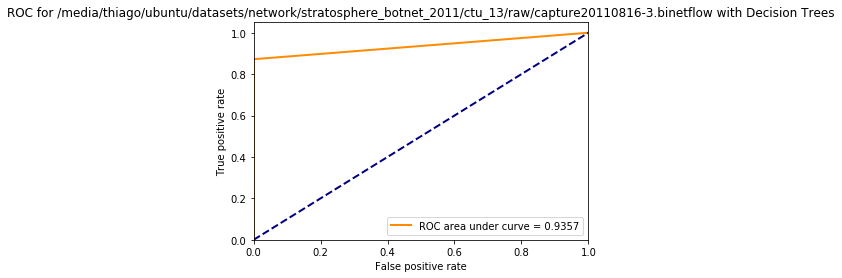

accuracy: 0.9988098437440013
precision: 0.9986168741355463
recall: 0.8242009132420092
f1: 0.9030644152595372


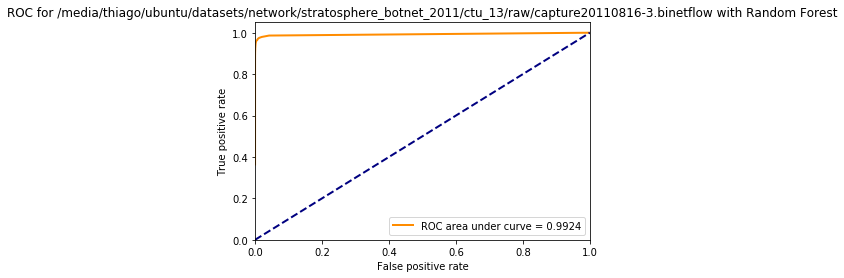

saved_data/saved_0.15s_17.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9871505982080584


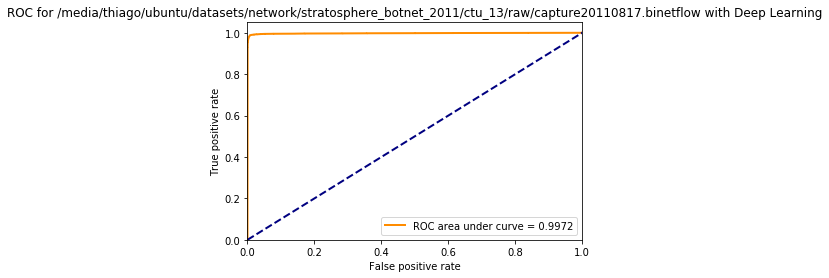

accuracy: 0.9776543805998176
precision: 0.9736366677818669
recall: 0.9707138092061375
f1: 0.972173041590112


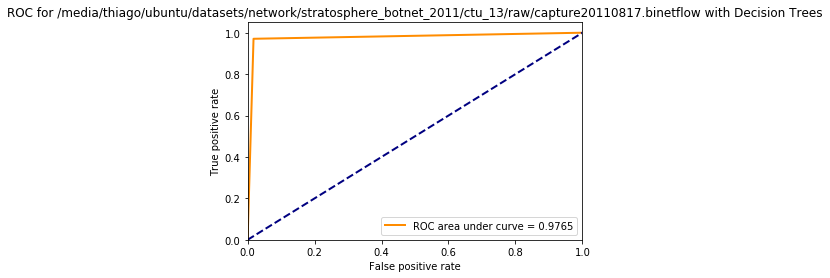

accuracy: 0.9833950319223135
precision: 0.9830588235294118
recall: 0.975517011340894
f1: 0.9792733969529549


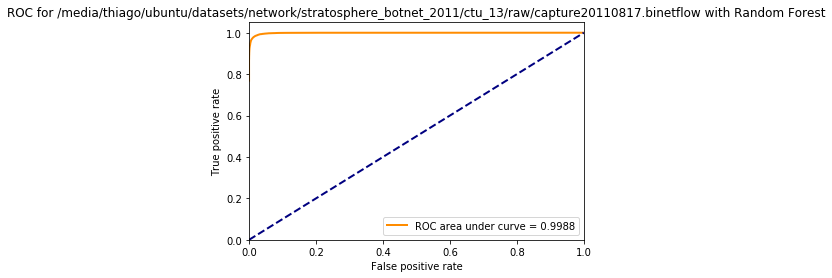

saved_data/saved_0.15s_18.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9904552800902632


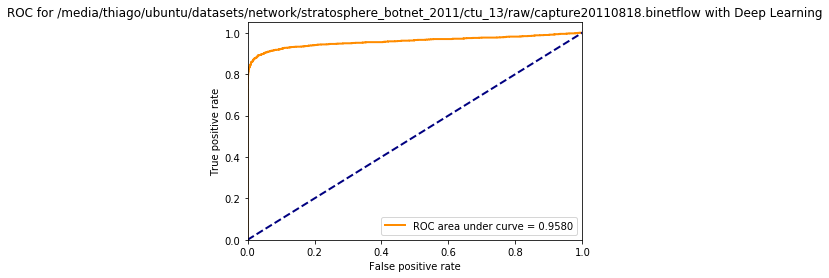

accuracy: 0.9917055469155003
precision: 0.9161129568106312
recall: 0.8657770800627943
f1: 0.8902340597255851


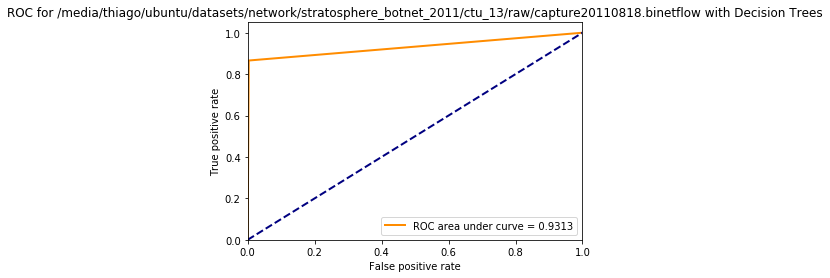

accuracy: 0.9926813649254415
precision: 0.962432915921288
recall: 0.8445839874411303
f1: 0.899665551839465


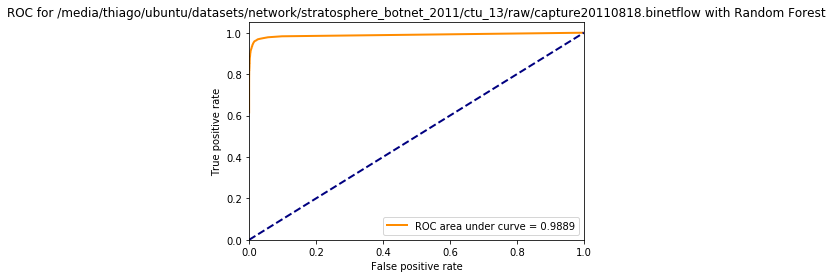

saved_data/saved_0.15s_18-2.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9803591470258137


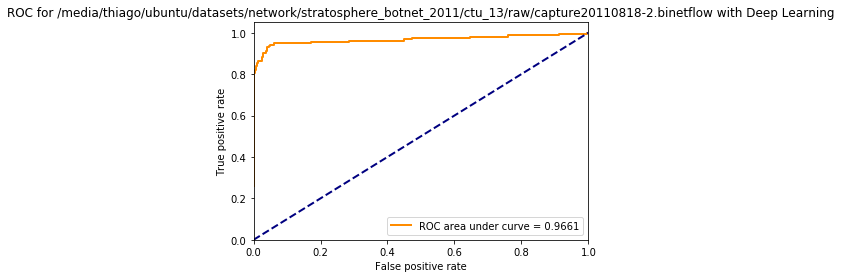

accuracy: 0.9624017957351291
precision: 0.775
recall: 0.8
f1: 0.7873015873015874


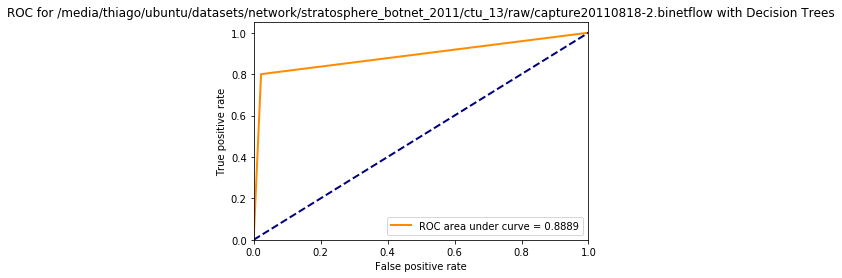

accuracy: 0.9758698092031426
precision: 0.9375
recall: 0.7741935483870968
f1: 0.8480565371024735


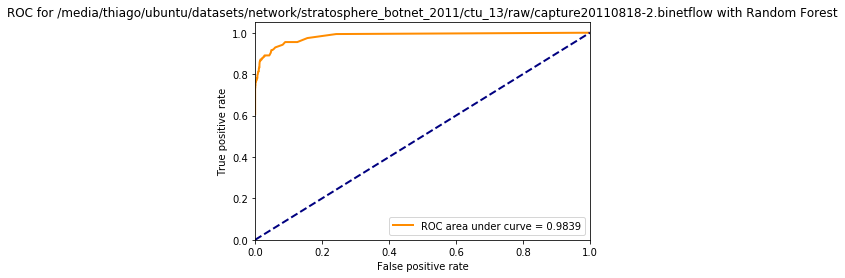

saved_data/saved_0.15s_19.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9667697948894236


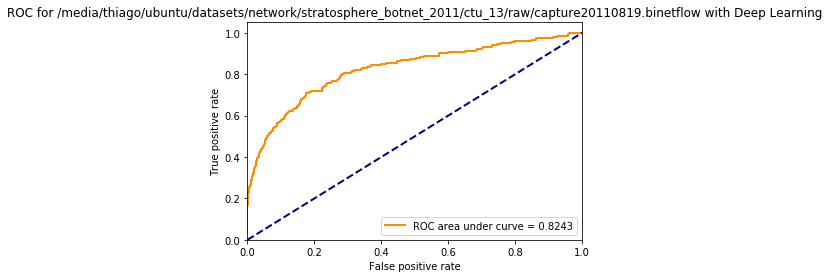

accuracy: 0.9852182880715022
precision: 0.7948717948717948
recall: 0.7482758620689656
f1: 0.7708703374777977


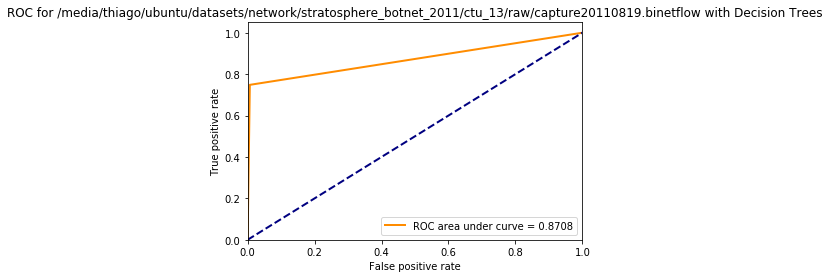

accuracy: 0.9878537870975135
precision: 0.9842105263157894
recall: 0.6448275862068965
f1: 0.7791666666666667


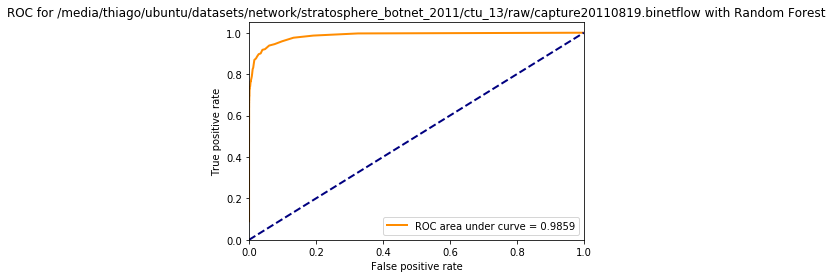

saved_data/saved_0.15s_15-3.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9971716652280115


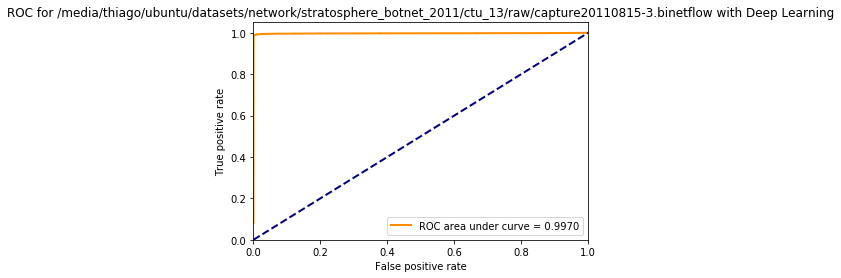

accuracy: 0.9982644309353708
precision: 0.9929499446067076
recall: 0.9880737622770094
f1: 0.9905058522127894


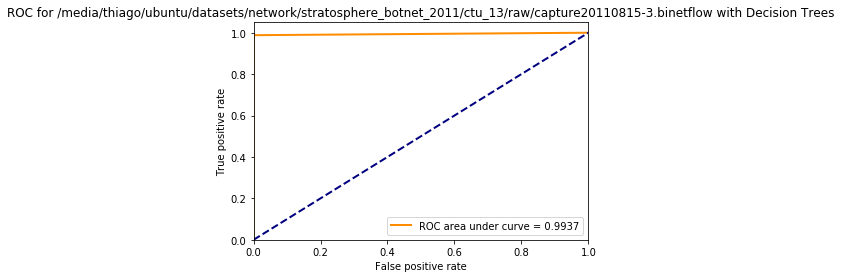

accuracy: 0.998567466803798
precision: 0.9975683890577508
recall: 0.9867708959711365
f1: 0.9921402660217654


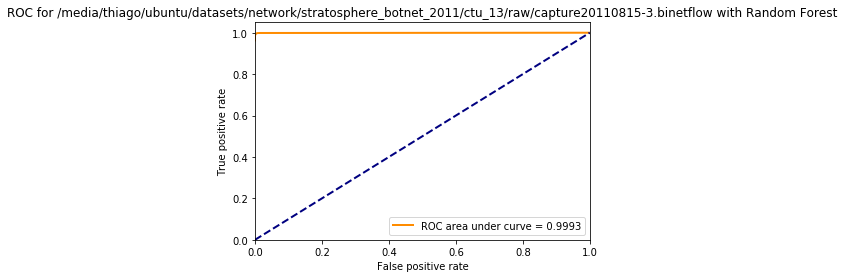

In [6]:
for binet in binet_files:
    feature, label = get_feature_labels(get_saved_data(0.15, binet))
    plot_roc_curve('tf', feature, label, binet, .3)
    plot_roc_curve('dt', feature, label, binet, .3)
    plot_roc_curve('rf', feature, label, binet, .3)

saved_data/saved_0.25s_10.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.8684055207590311


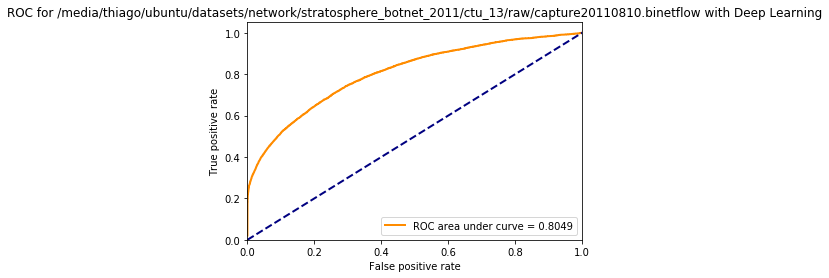

accuracy: 0.9563924452919277
precision: 0.8626870580496628
recall: 0.82849020846494
f1: 0.8452428905180053


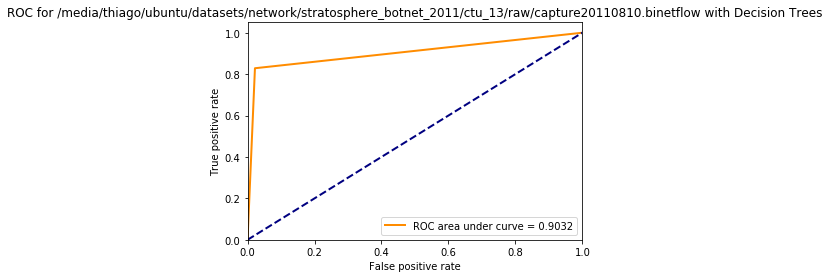

accuracy: 0.9641786979024789
precision: 0.98097936058276
recall: 0.7656348704990524
f1: 0.8600319318786588


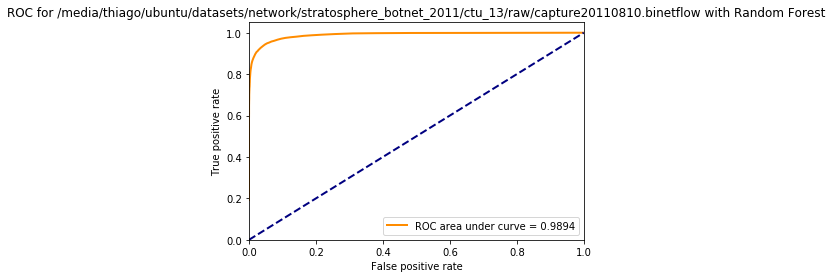

saved_data/saved_0.25s_11.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.8697394114834284


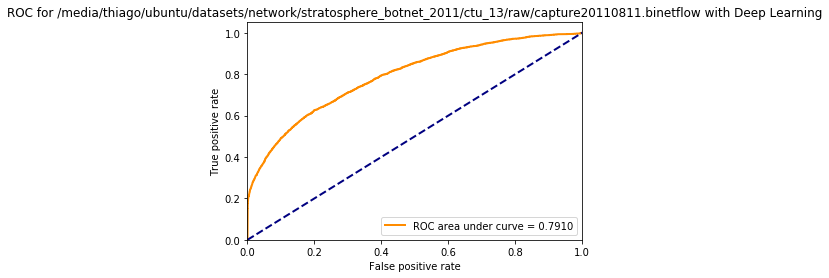

accuracy: 0.9480843040872668
precision: 0.7994851994851995
recall: 0.8027914189713105
f1: 0.8011348981171009


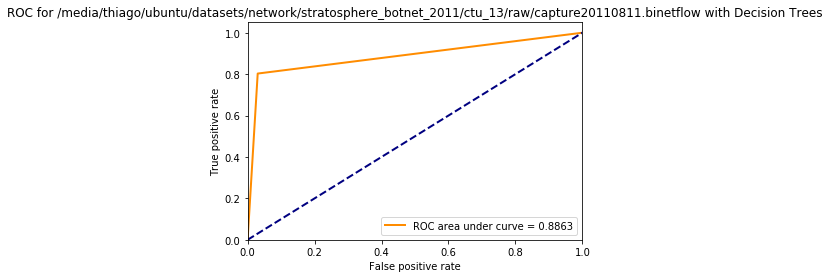

accuracy: 0.9655578748905798
precision: 0.9759197324414716
recall: 0.7542000516929439
f1: 0.8508528940078729


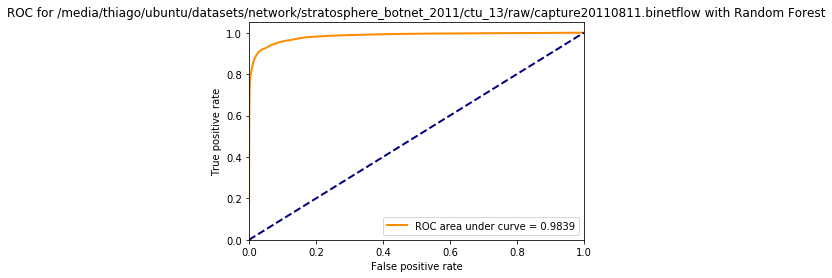

saved_data/saved_0.25s_12.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9954337668129618


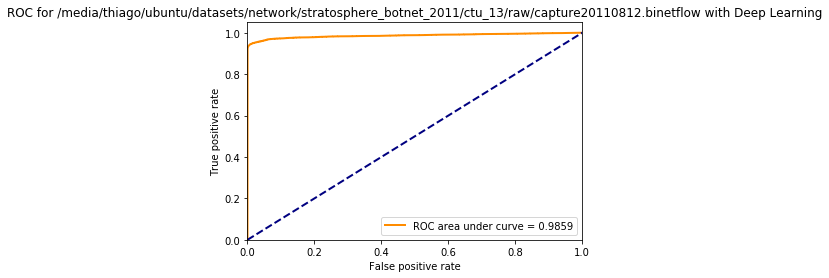

accuracy: 0.996827456187474
precision: 0.9530129420492952
recall: 0.9442946990116802
f1: 0.9486337901042093


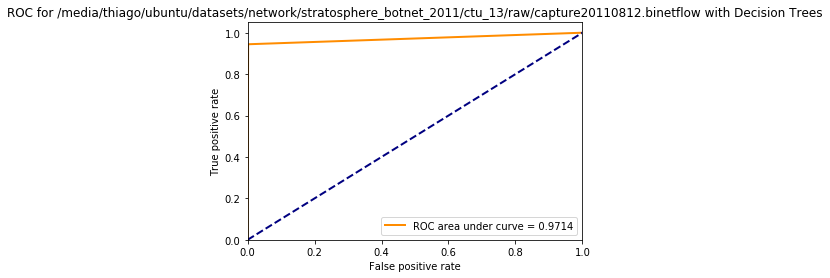

accuracy: 0.9976966115610335
precision: 0.9903097421699256
recall: 0.9349015764110103
f1: 0.9618083273812026


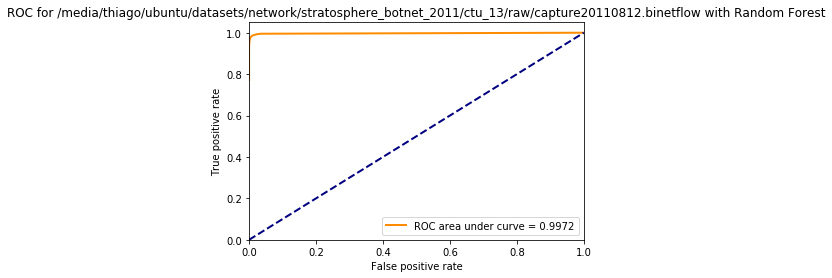

saved_data/saved_0.25s_15.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9757062146892655


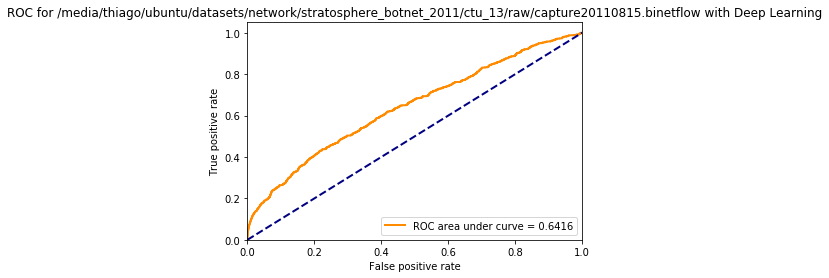

accuracy: 0.9748753738783649
precision: 0.4818577648766328
recall: 0.454172366621067
f1: 0.46760563380281694


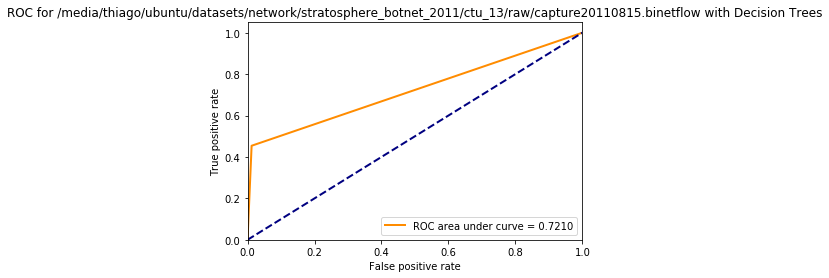

accuracy: 0.9791957460950482
precision: 0.9411764705882353
recall: 0.15321477428180574
f1: 0.26352941176470585


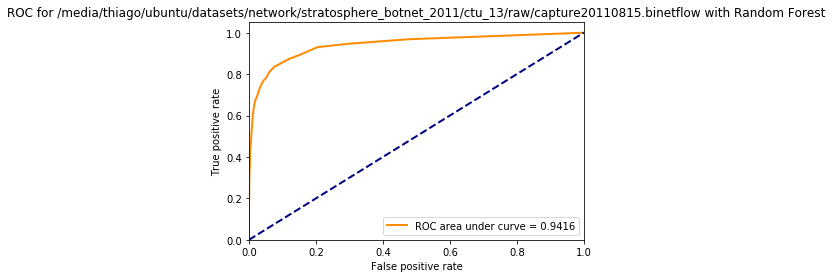

saved_data/saved_0.25s_15-2.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.8960244648318043


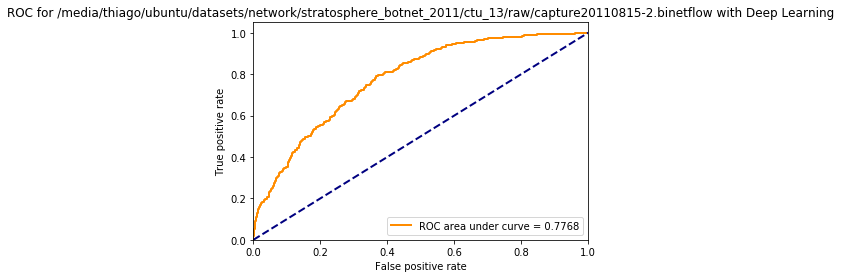

accuracy: 0.8743397275507367
precision: 0.38920454545454547
recall: 0.3663101604278075
f1: 0.37741046831955927


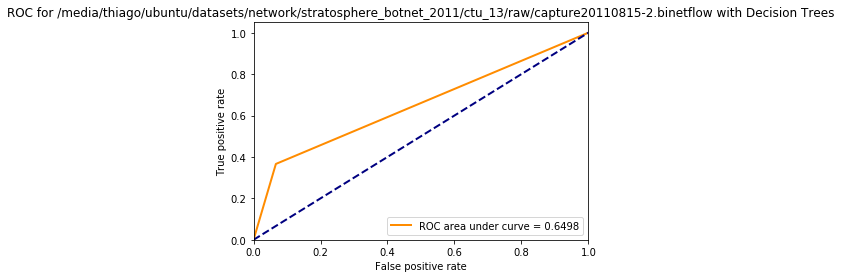

accuracy: 0.9057547956630525
precision: 0.8181818181818182
recall: 0.12032085561497326
f1: 0.20979020979020976


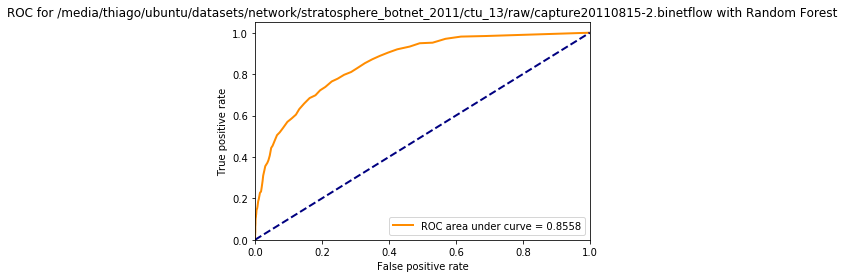

saved_data/saved_0.25s_16.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9765928068906569


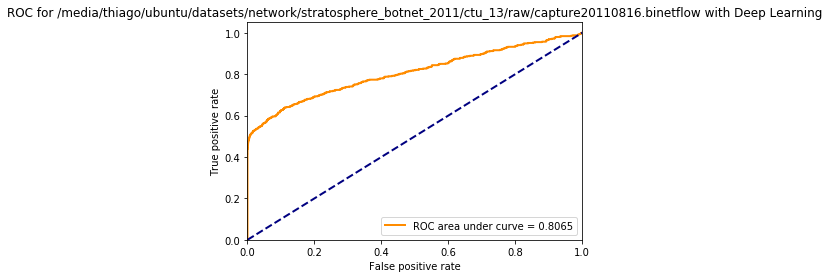

accuracy: 0.9703465053586692
precision: 0.5393518518518519
recall: 0.48041237113402063
f1: 0.5081788440567067


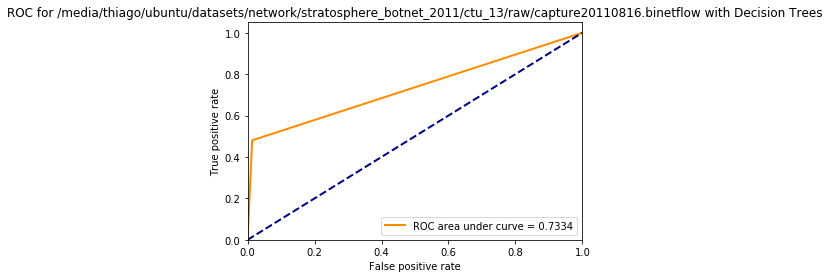

accuracy: 0.9819843513708988
precision: 1.0
recall: 0.4350515463917526
f1: 0.6063218390804598


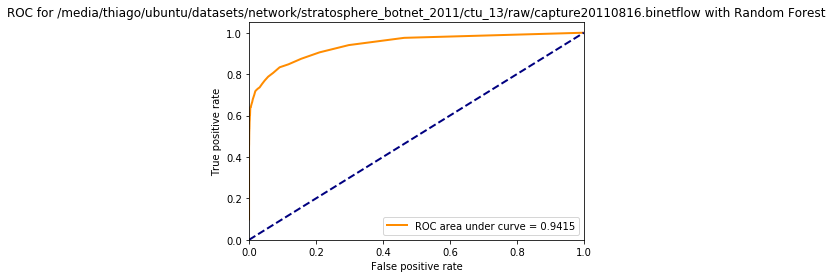

saved_data/saved_0.25s_16-2.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9943480016148567


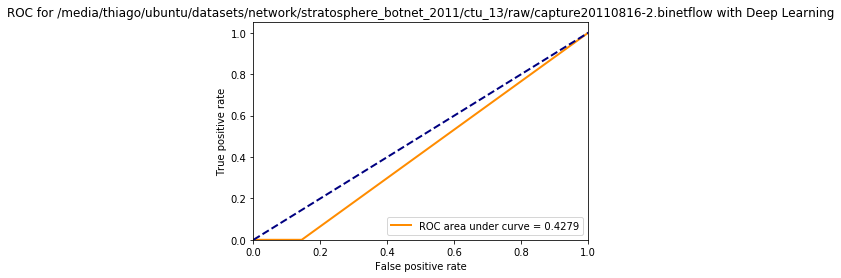

accuracy: 0.9878885748889786
precision: 0.0
recall: 0.0
f1: 0.0


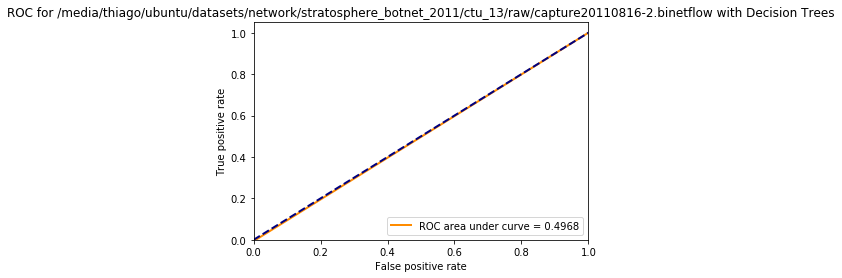

accuracy: 0.9943480016148567
precision: 0.0
recall: 0.0
f1: 0.0


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


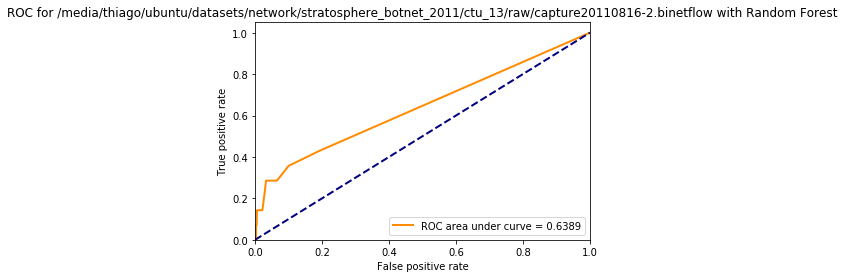

saved_data/saved_0.25s_16-3.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9896919198890011


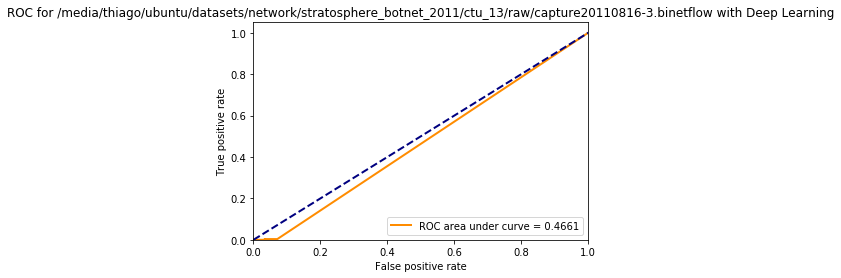

accuracy: 0.9957503686645988
precision: 0.8159090909090909
recall: 0.758985200845666
f1: 0.7864184008762323


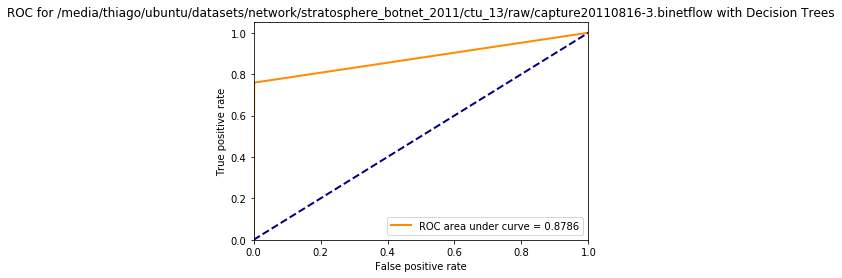

accuracy: 0.996244342905295
precision: 0.9966960352422908
recall: 0.6377730796335448
f1: 0.7778255264288784


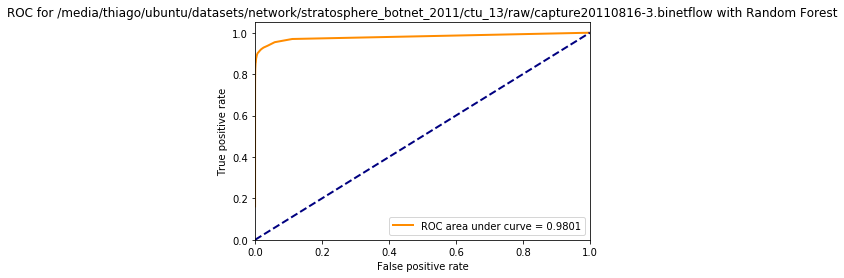

saved_data/saved_0.25s_17.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9513443958930917


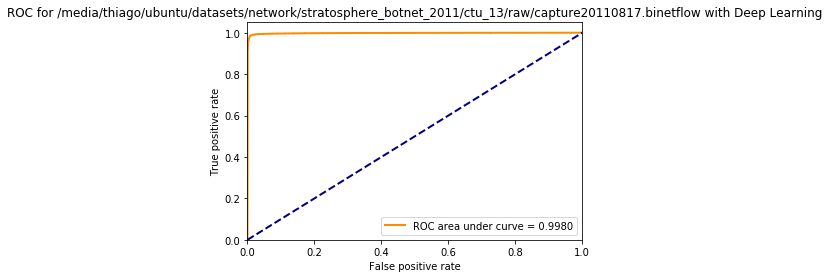

accuracy: 0.9462241642763317
precision: 0.9421902400677269
recall: 0.9368648908664542
f1: 0.9395200192957068


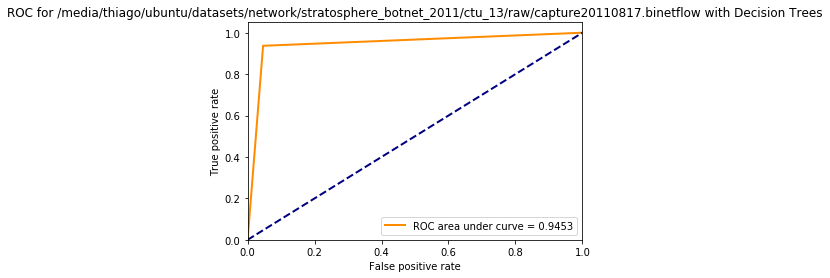

accuracy: 0.9674825081092674
precision: 0.9701183071106233
recall: 0.9565269677109013
f1: 0.9632746979926731


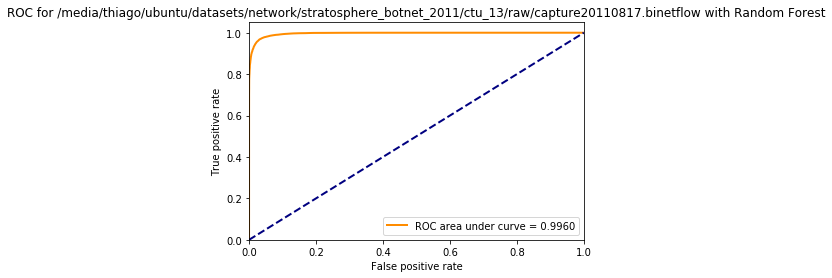

saved_data/saved_0.25s_18.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9870812678383656


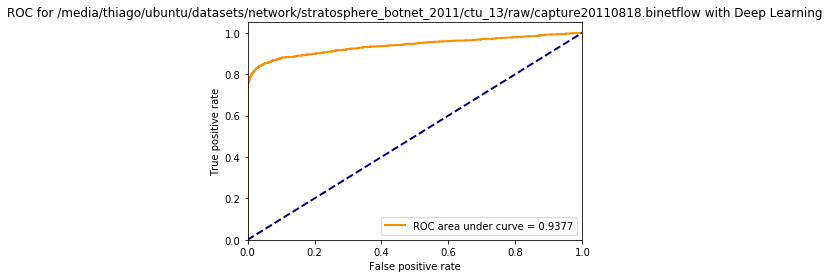

accuracy: 0.9839266937058735
precision: 0.8127883981542519
recall: 0.8308625336927223
f1: 0.821726091302899


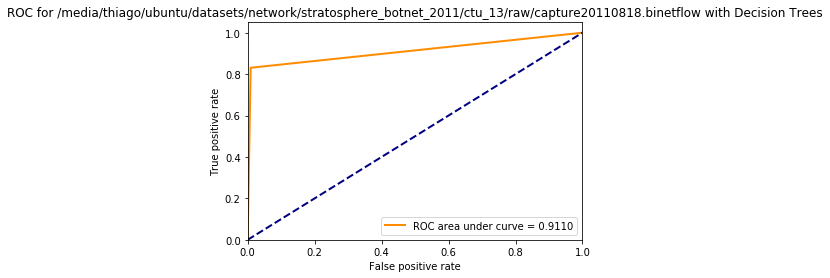

accuracy: 0.9902959290971909
precision: 0.9448275862068966
recall: 0.8308625336927223
f1: 0.8841878809609179


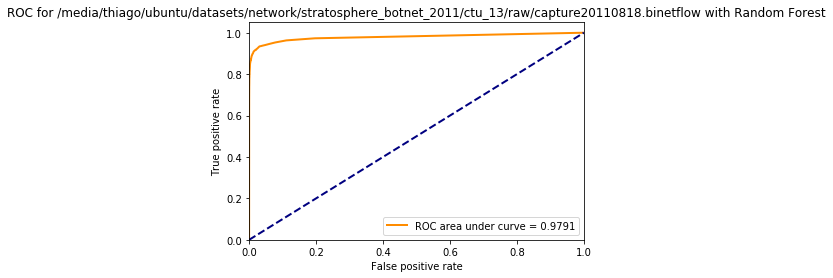

saved_data/saved_0.25s_18-2.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9764441953103862


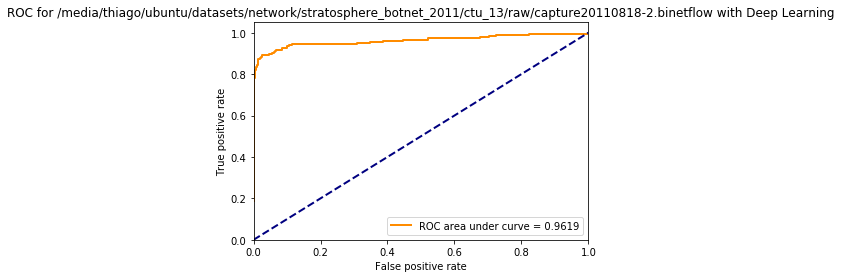

accuracy: 0.9663488502523836
precision: 0.8315217391304348
recall: 0.8406593406593407
f1: 0.8360655737704918


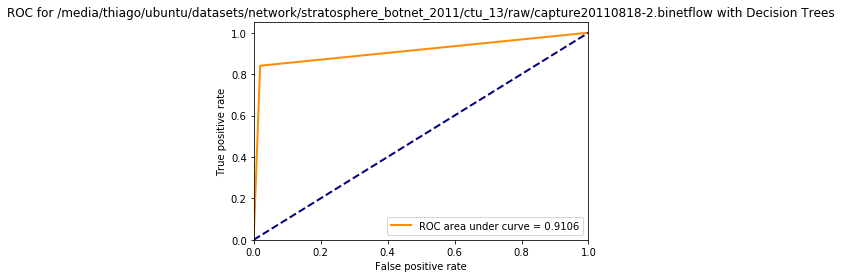

accuracy: 0.978687605159843
precision: 0.9444444444444444
recall: 0.8406593406593407
f1: 0.8895348837209303


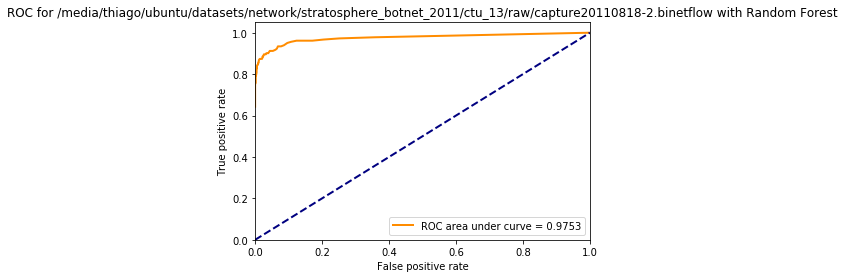

saved_data/saved_0.25s_19.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9469308734768249


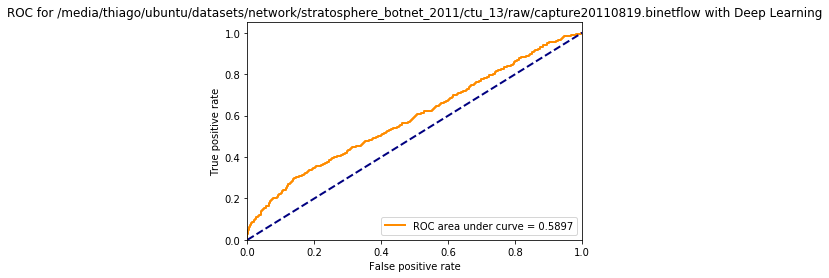

accuracy: 0.9479558136886459
precision: 0.5114503816793893
recall: 0.4313304721030043
f1: 0.46798603026775315


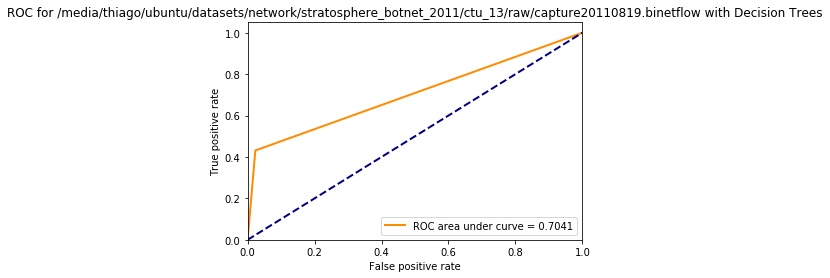

accuracy: 0.9558136886459401
precision: 1.0
recall: 0.16738197424892703
f1: 0.2867647058823529


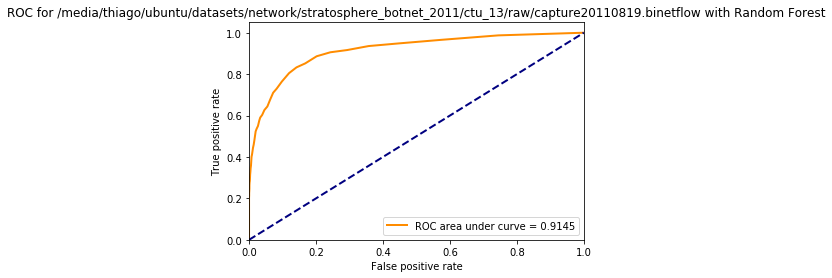

saved_data/saved_0.25s_15-3.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9567434196347192


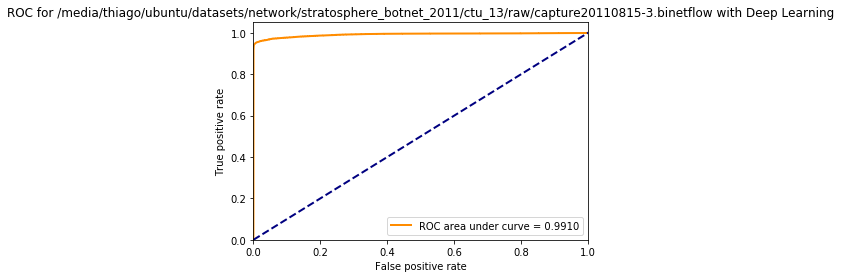

accuracy: 0.9951515360658425
precision: 0.9840516423011202
recall: 0.9804527397692162
f1: 0.9822488945041061


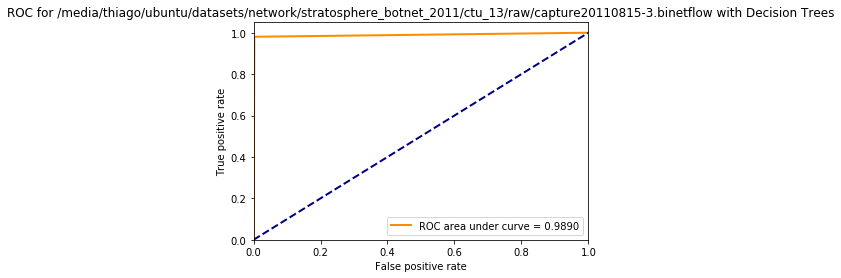

accuracy: 0.9963334569892937
precision: 0.9956326268464997
recall: 0.9774891228955167
f1: 0.9864774571255847


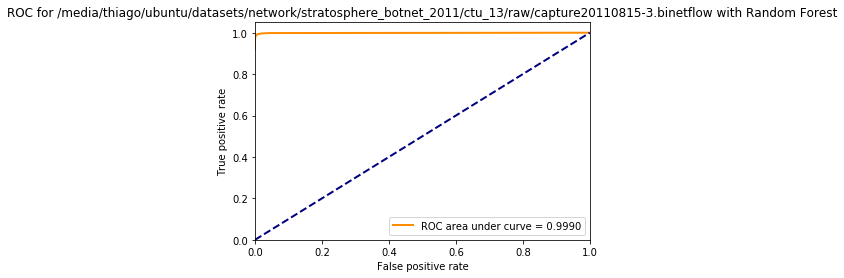

In [7]:
for binet in binet_files:
    feature, label = get_feature_labels(get_saved_data(0.25, binet))
    plot_roc_curve('tf', feature, label, binet)
    plot_roc_curve('dt', feature, label, binet)
    plot_roc_curve('rf', feature, label, binet)

saved_data/saved_1s_10.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.4067550390439261


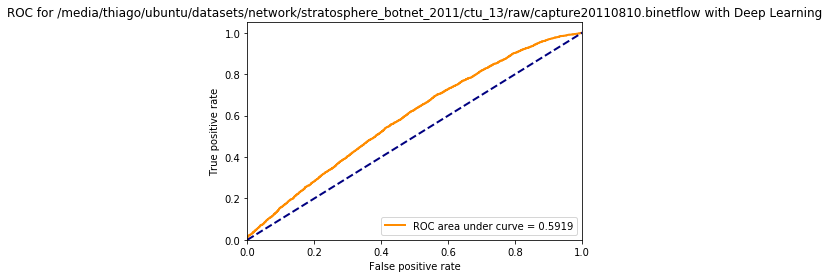

accuracy: 0.7101870346831306
precision: 0.6371866295264624
recall: 0.6275720164609053
f1: 0.632342778161714


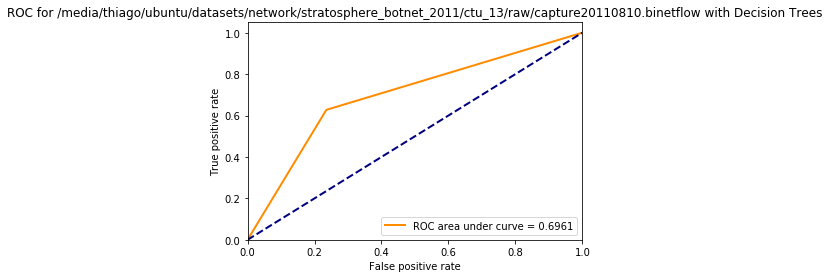

accuracy: 0.7893589976393681
precision: 0.8209375
recall: 0.6005944215820759
f1: 0.6936889358331132


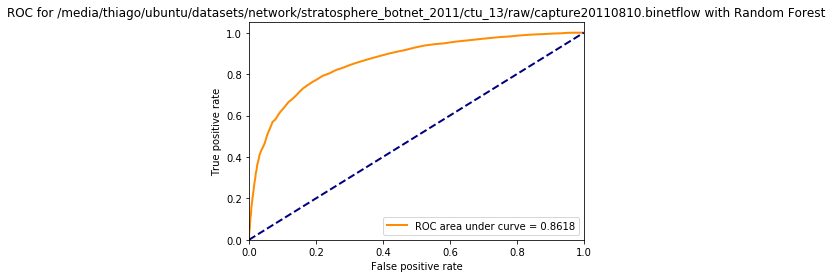

saved_data/saved_1s_11.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.6885267977376784


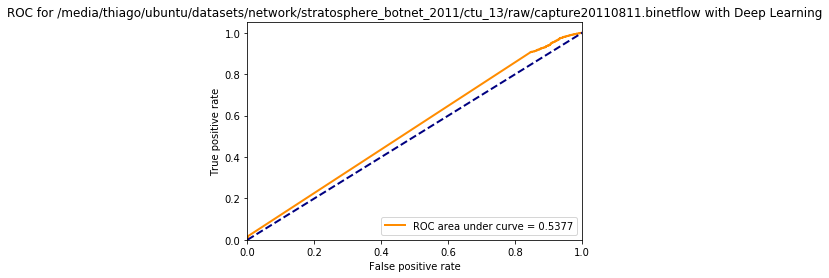

accuracy: 0.7158631834096418
precision: 0.550680122860904
recall: 0.5360956856044425
f1: 0.5432900432900434


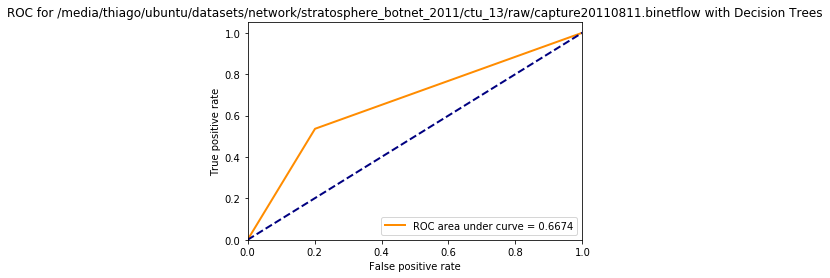

accuracy: 0.7990842984109884
precision: 0.836104513064133
recall: 0.4510892780862879
f1: 0.586015538290788


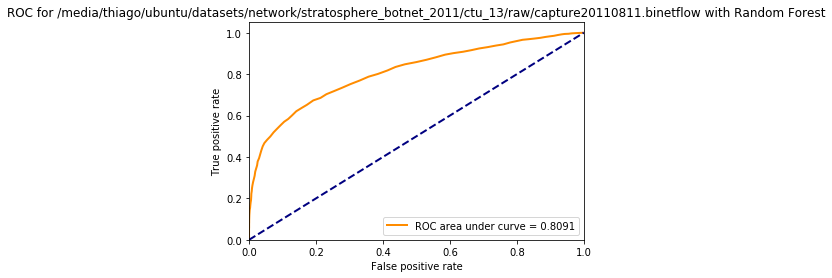

saved_data/saved_1s_12.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9738004023002896


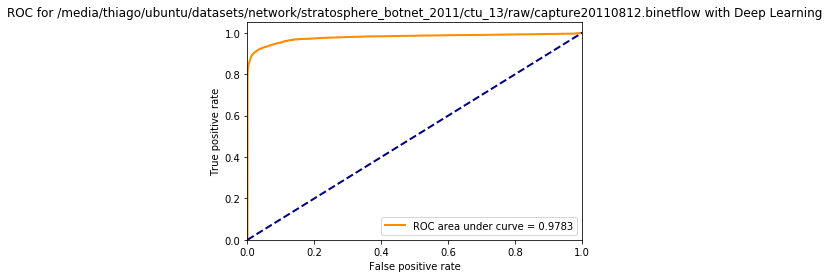

accuracy: 0.9549874385490481
precision: 0.7508366291451172
recall: 0.7160541586073501
f1: 0.7330330181674174


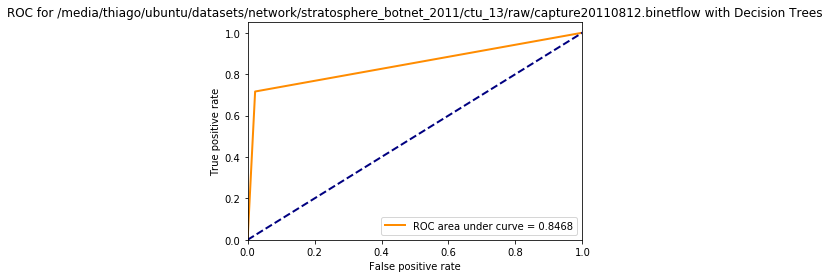

accuracy: 0.971538506481041
precision: 0.9272503082614056
recall: 0.7272727272727273
f1: 0.8151761517615176


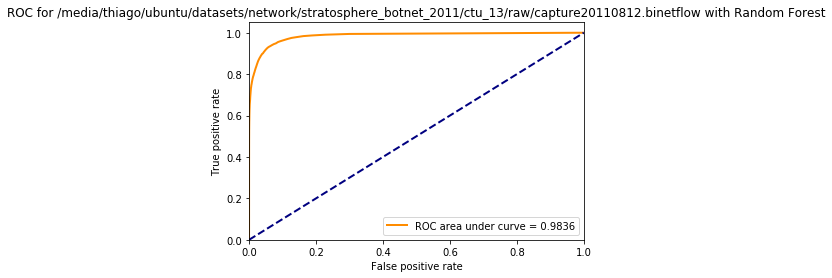

saved_data/saved_1s_15.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9295681063122924


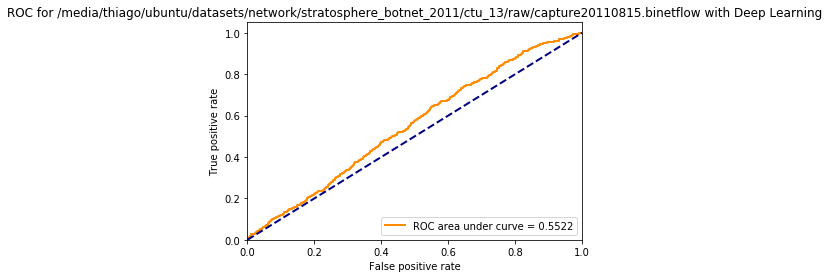

accuracy: 0.8916943521594685
precision: 0.22330097087378642
recall: 0.2169811320754717
f1: 0.22009569377990432


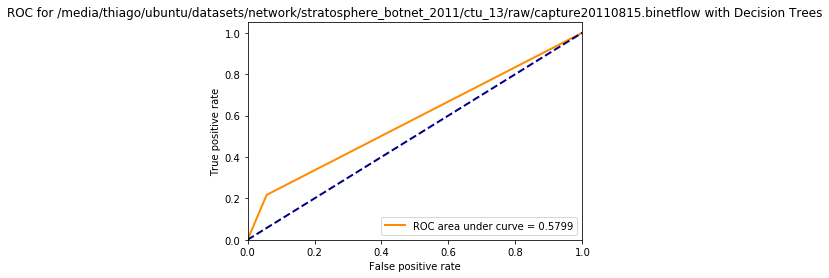

accuracy: 0.9294352159468439
precision: 0.49056603773584906
recall: 0.04905660377358491
f1: 0.08919382504288166


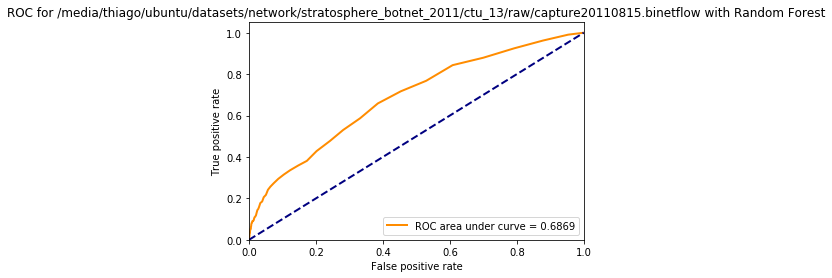

saved_data/saved_1s_15-2.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.6977777777777778


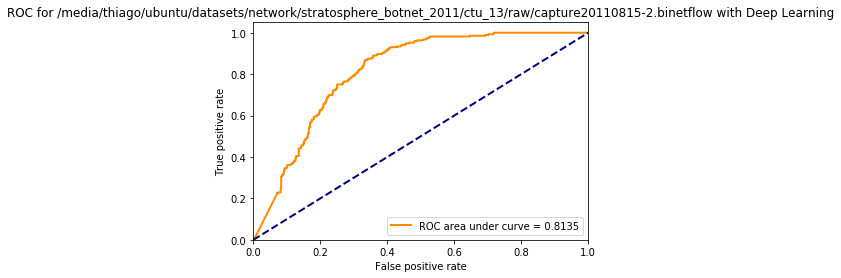

accuracy: 0.7188888888888889
precision: 0.54337899543379
recall: 0.4375
f1: 0.4847250509164969


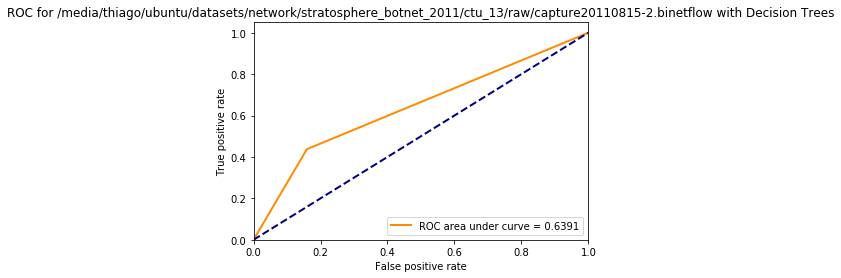

accuracy: 0.7477777777777778
precision: 0.6142131979695431
recall: 0.44485294117647056
f1: 0.5159914712153517


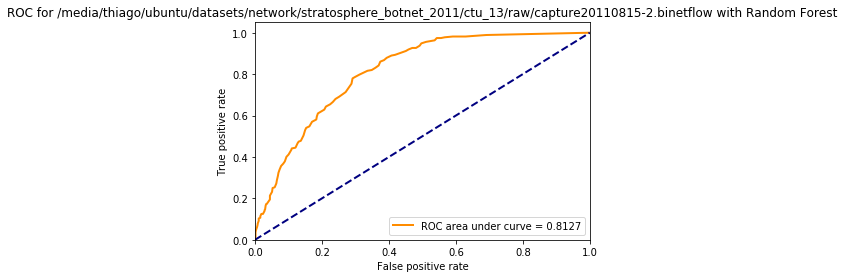

saved_data/saved_1s_16.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9025479377897386


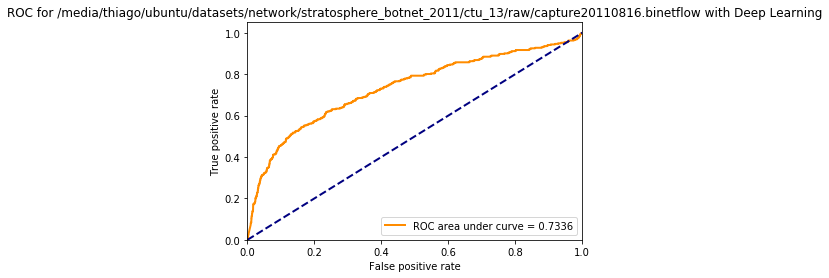

accuracy: 0.888100866824271
precision: 0.4250681198910082
recall: 0.42048517520215634
f1: 0.4227642276422764


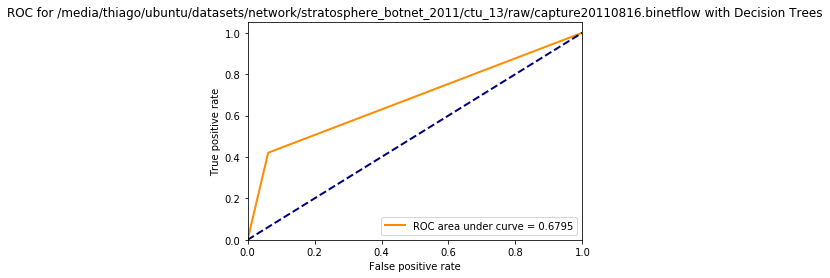

accuracy: 0.9335434725505648
precision: 0.946969696969697
recall: 0.33692722371967654
f1: 0.49701789264413515


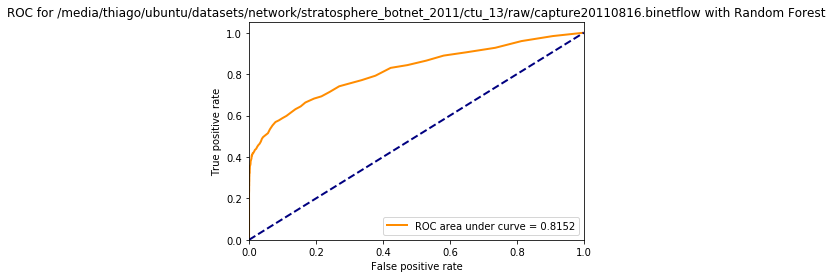

saved_data/saved_1s_16-2.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9806451612903225


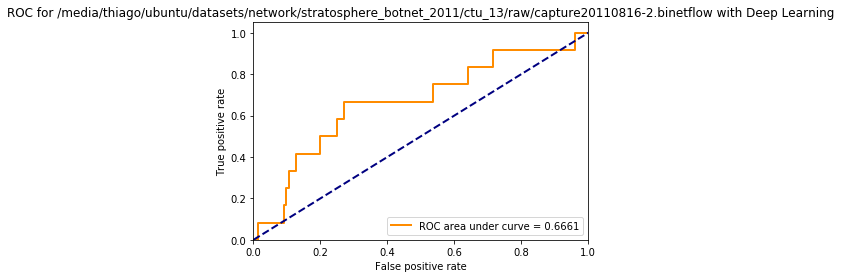

accuracy: 0.9693548387096774
precision: 0.1111111111111111
recall: 0.08333333333333333
f1: 0.09523809523809525


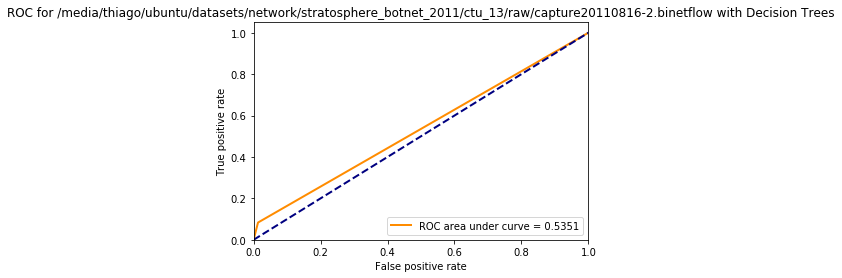

accuracy: 0.9806451612903225
precision: 0.0
recall: 0.0
f1: 0.0


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


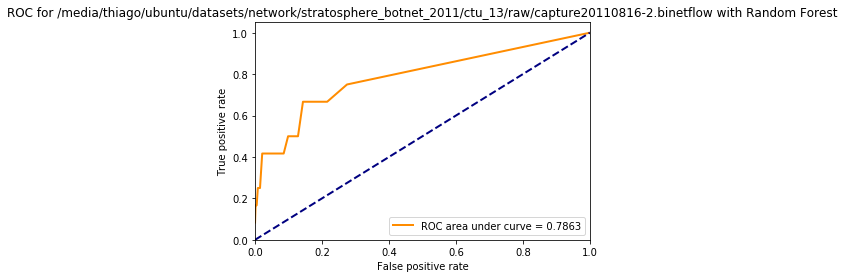

saved_data/saved_1s_16-3.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.964659048600968


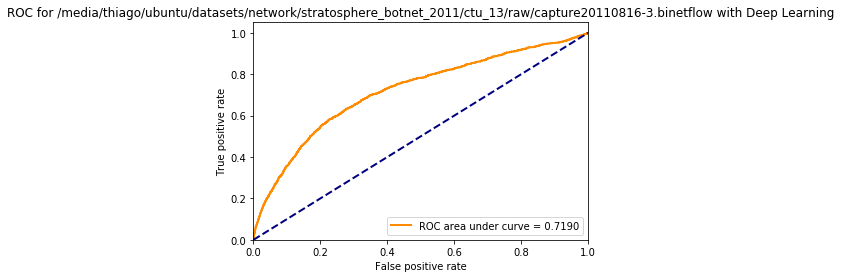

accuracy: 0.9517999828163931
precision: 0.31022823330515636
recall: 0.29740680713128037
f1: 0.303682250724038


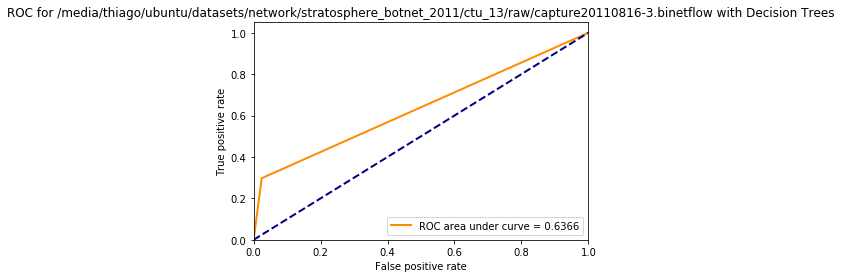

accuracy: 0.9699000486868861
precision: 0.9841269841269841
recall: 0.1507293354943274
f1: 0.2614195361911455


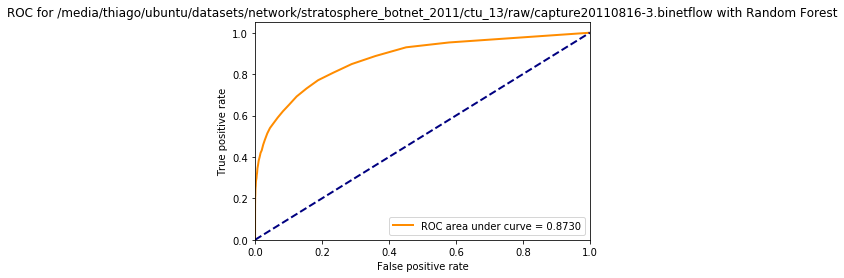

saved_data/saved_1s_17.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.650016078925718


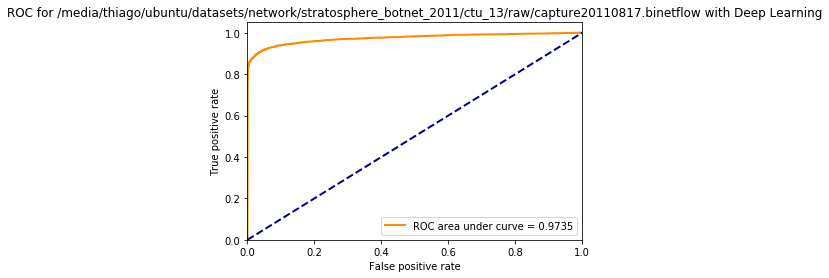

accuracy: 0.8871261657197985
precision: 0.883304940374787
recall: 0.8914678701912745
f1: 0.8873676329019147


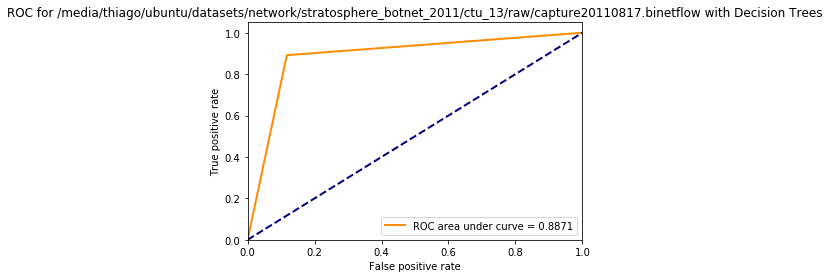

accuracy: 0.9373995069139244
precision: 0.9682393555811277
recall: 0.9041478615946701
f1: 0.9350966881529228


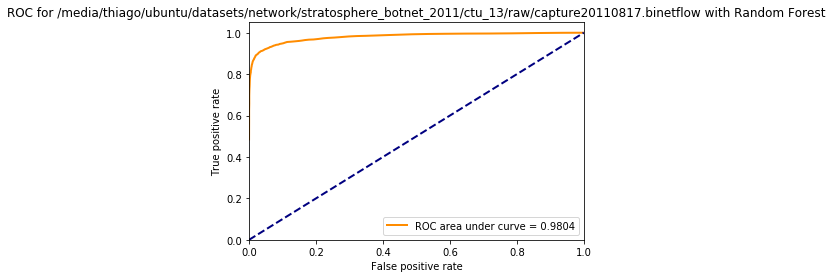

saved_data/saved_1s_18.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9609097369444142


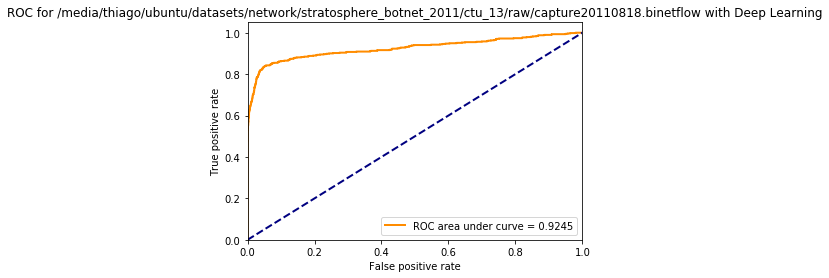

accuracy: 0.9662402274342573
precision: 0.75
recall: 0.7513134851138353
f1: 0.7506561679790025


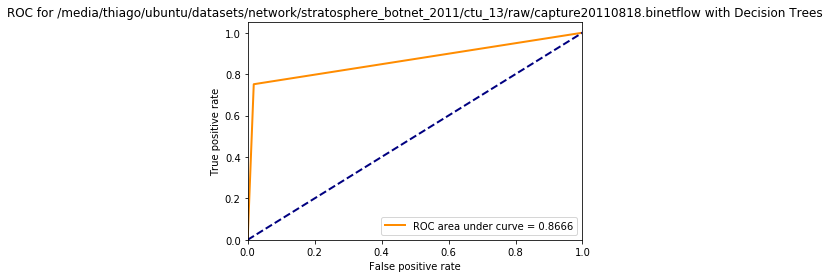

accuracy: 0.9800995024875622
precision: 0.9278131634819533
recall: 0.7653239929947461
f1: 0.8387715930902111


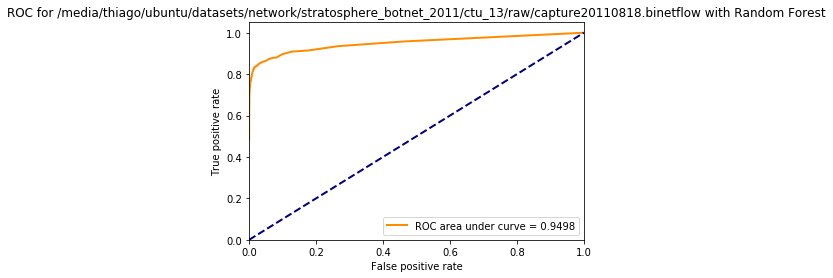

saved_data/saved_1s_18-2.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9439461864698093


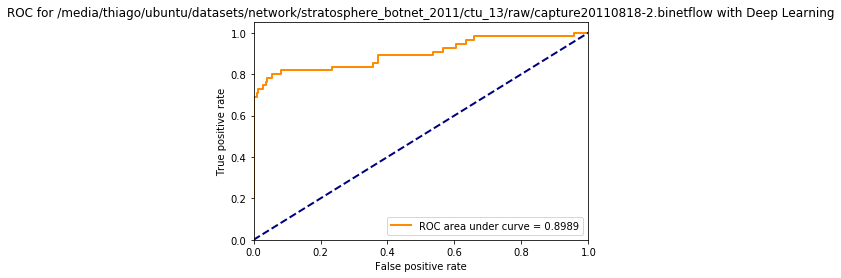

accuracy: 0.9439461883408071
precision: 0.7884615384615384
recall: 0.7454545454545455
f1: 0.766355140186916


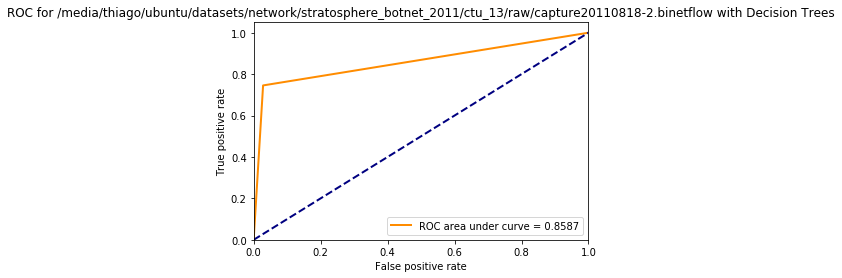

accuracy: 0.9596412556053812
precision: 0.9111111111111111
recall: 0.7454545454545455
f1: 0.8200000000000001


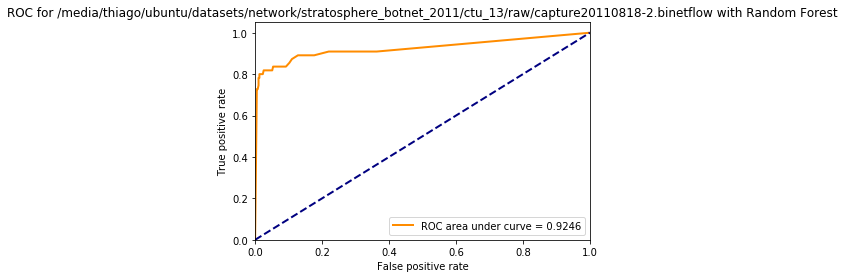

saved_data/saved_1s_19.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.8720400727511756


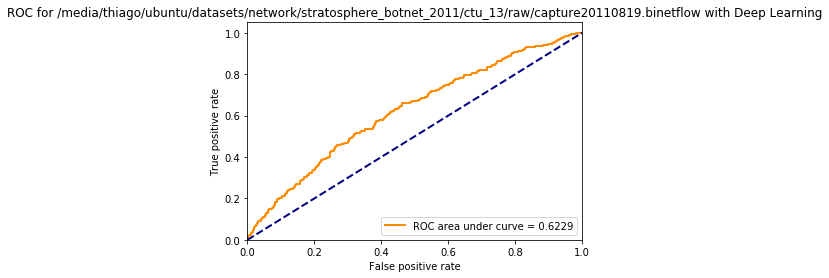

accuracy: 0.7982695810564663
precision: 0.237012987012987
recall: 0.2597864768683274
f1: 0.24787775891341254


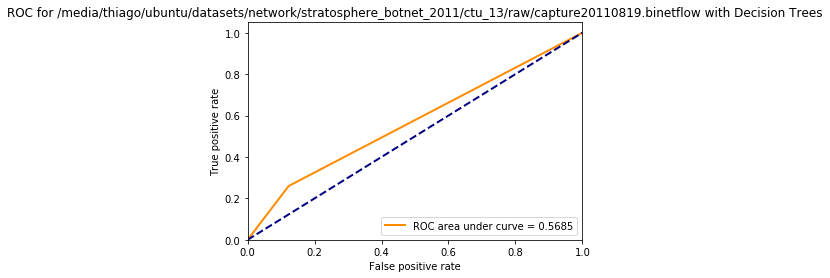

accuracy: 0.8756830601092896
precision: 0.6538461538461539
recall: 0.060498220640569395
f1: 0.11074918566775244


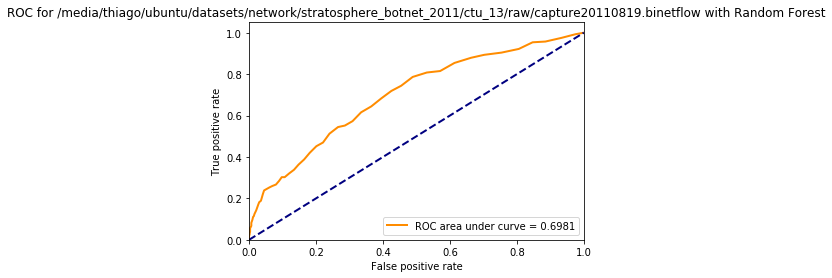

saved_data/saved_1s_15-3.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.5366366876156812


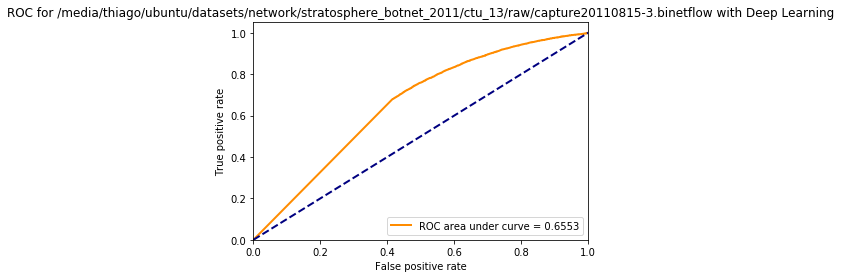

accuracy: 0.884710673680638
precision: 0.8748538011695907
recall: 0.8765839009741448
f1: 0.8757179965609336


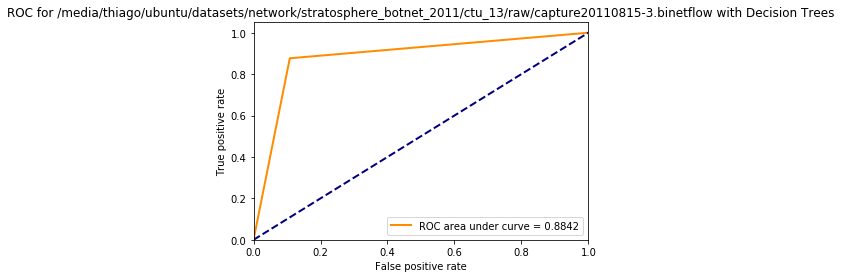

accuracy: 0.9276429662311216
precision: 0.940641015834162
recall: 0.9006811689738519
f1: 0.9202274938262366


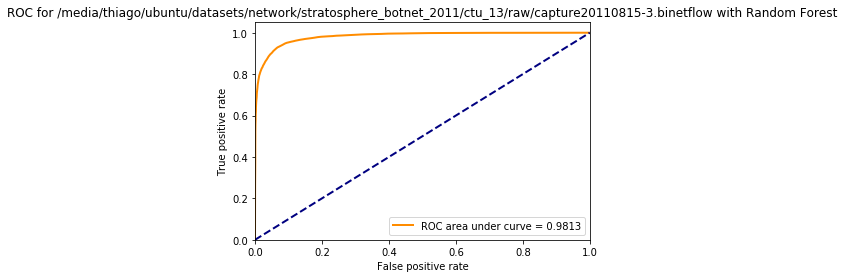

In [8]:
for binet in binet_files:
    feature, label = get_feature_labels(get_saved_data(1, binet))
    plot_roc_curve('tf', feature, label, binet)
    plot_roc_curve('dt', feature, label, binet)
    plot_roc_curve('rf', feature, label, binet)

saved_data/saved_2s_10.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.5295078990375885


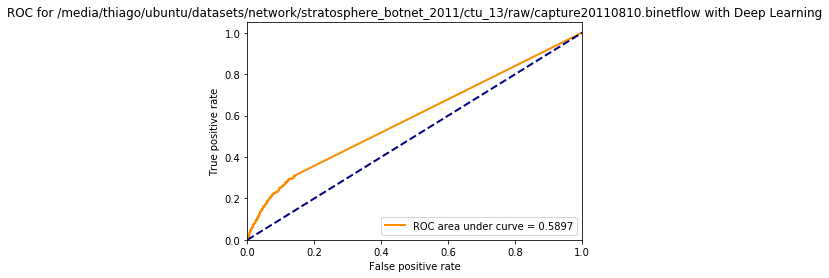

accuracy: 0.656982022879971
precision: 0.6730834177642688
recall: 0.6839396019217571
f1: 0.6784680851063829


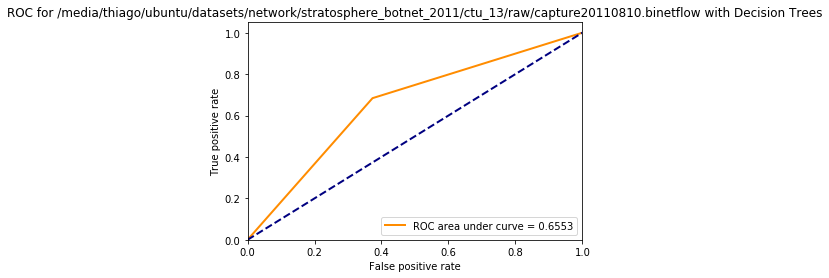

accuracy: 0.7116397312511349
precision: 0.7088846880907372
recall: 0.7721345229924502
f1: 0.7391590013140604


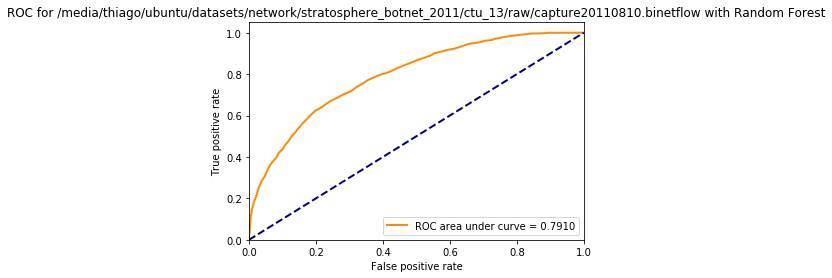

saved_data/saved_2s_11.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.5564233773229195


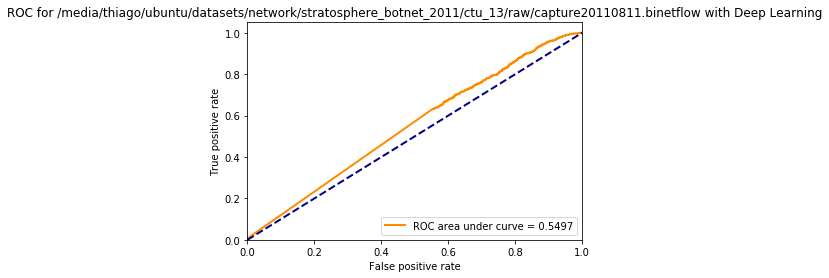

accuracy: 0.5774306490708322
precision: 0.52925877763329
recall: 0.49065702230259195
f1: 0.5092274006881452


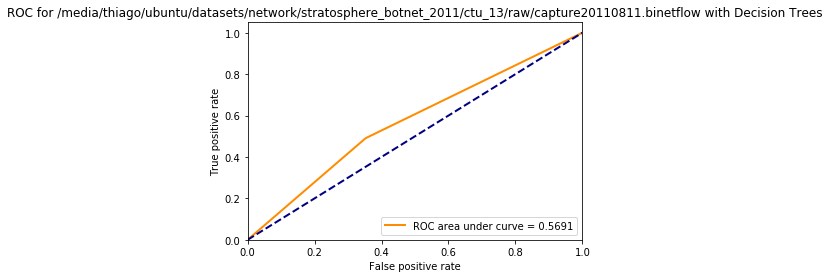

accuracy: 0.6436843522757878
precision: 0.6141304347826086
recall: 0.5449065702230259
f1: 0.5774512935164483


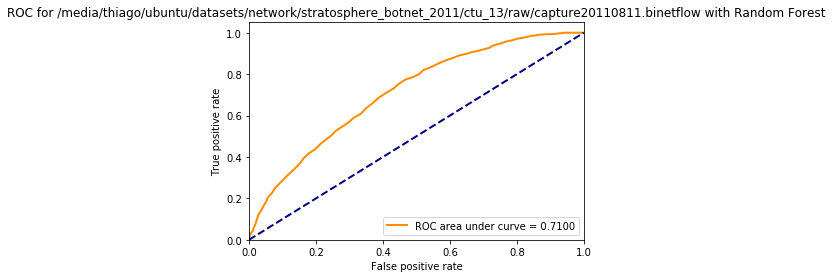

saved_data/saved_2s_12.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.8777615118445569


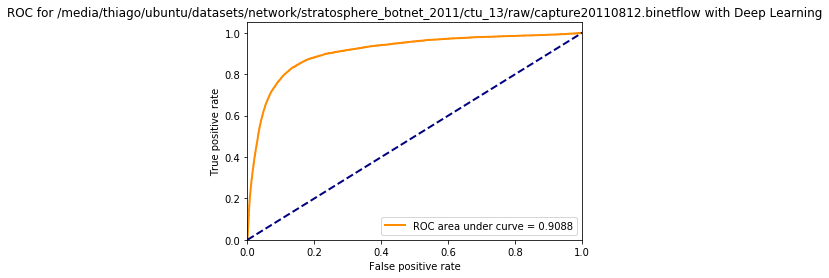

accuracy: 0.8949461006121906
precision: 0.6088740702744293
recall: 0.5925371271683514
f1: 0.6005945228005818


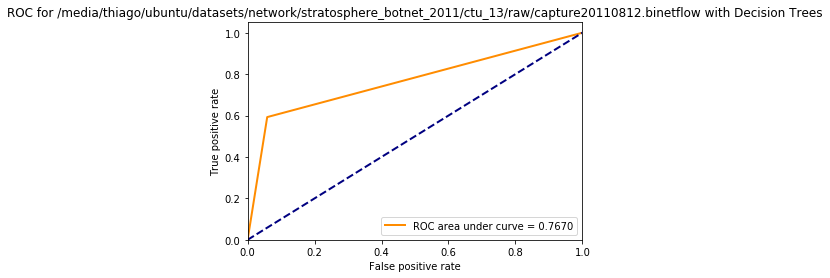

accuracy: 0.9236092627096087
precision: 0.7528455284552845
recall: 0.6355921627355547
f1: 0.6892678305589389


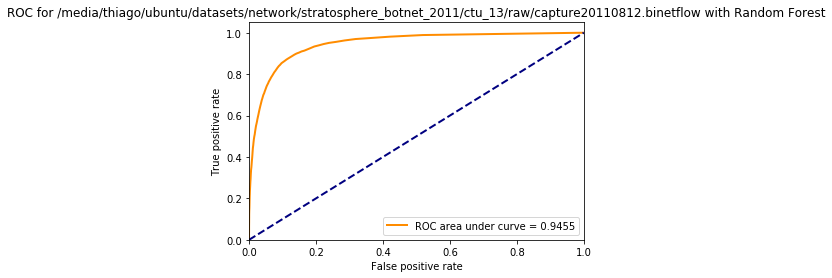

saved_data/saved_2s_15.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.8828062717026927


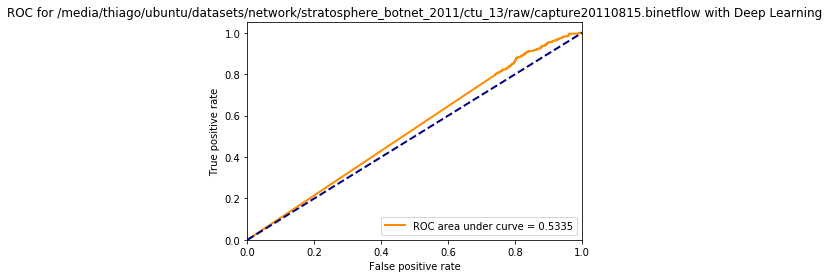

accuracy: 0.8176986446983789
precision: 0.19901719901719903
recall: 0.1836734693877551
f1: 0.19103773584905662


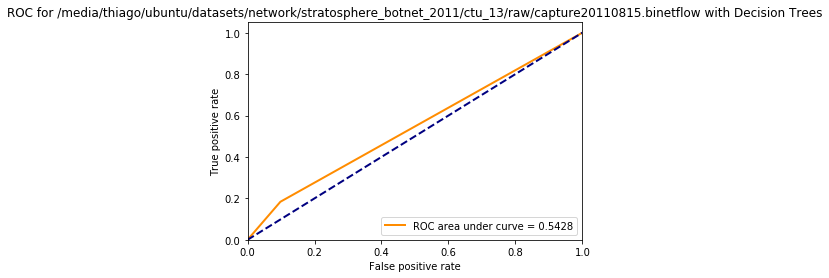

accuracy: 0.8814775445123572
precision: 0.4358974358974359
recall: 0.03854875283446712
f1: 0.07083333333333333


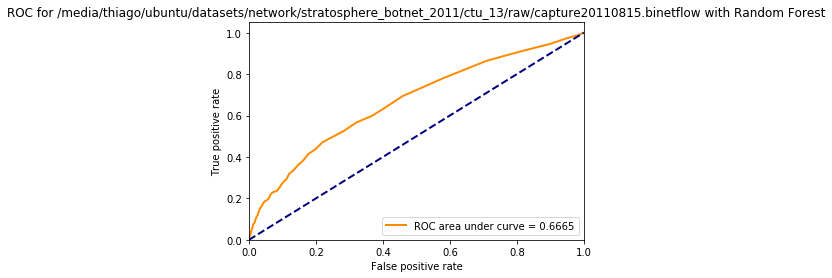

saved_data/saved_2s_15-2.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.7511111111111111


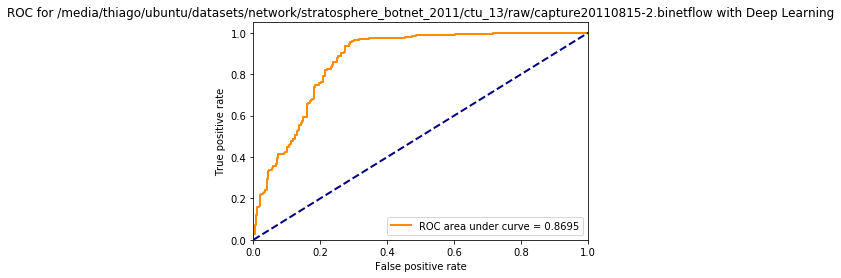

accuracy: 0.7644444444444445
precision: 0.6981981981981982
recall: 0.7989690721649485
f1: 0.7451923076923077


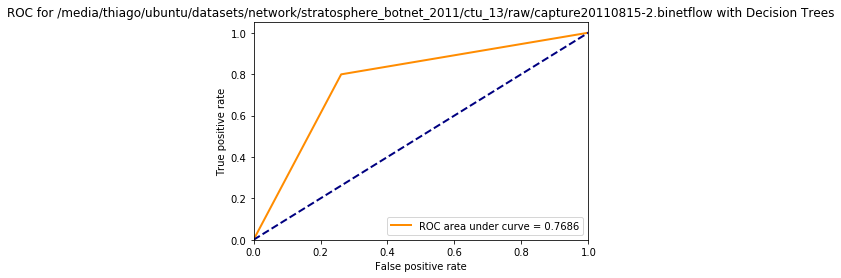

accuracy: 0.7977777777777778
precision: 0.7417840375586855
recall: 0.8144329896907216
f1: 0.7764127764127764


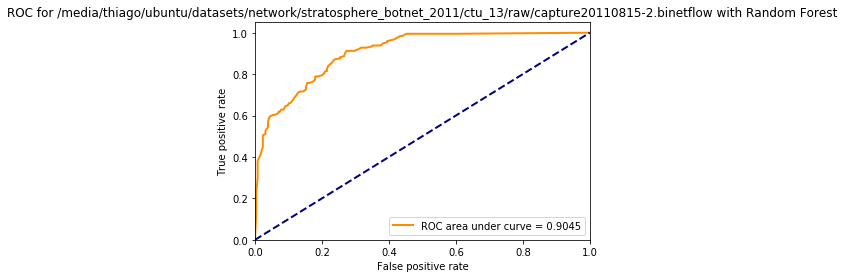

saved_data/saved_2s_16.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.7930672268907563


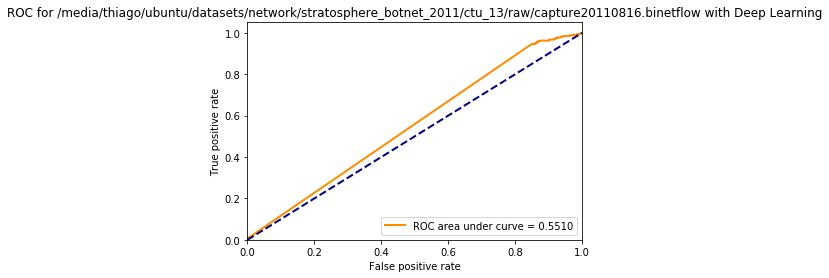

accuracy: 0.7389705882352942
precision: 0.37530266343825663
recall: 0.3934010152284264
f1: 0.38413878562577447


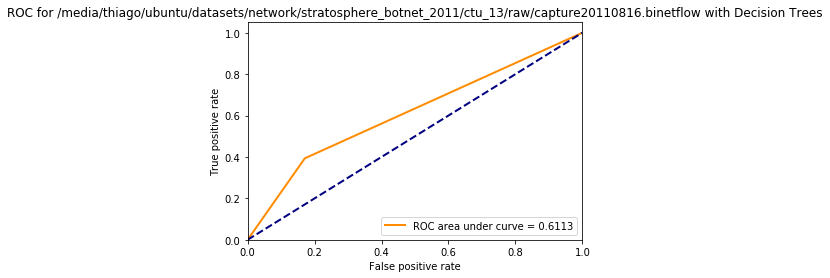

accuracy: 0.8340336134453782
precision: 0.875
recall: 0.23096446700507614
f1: 0.3654618473895582


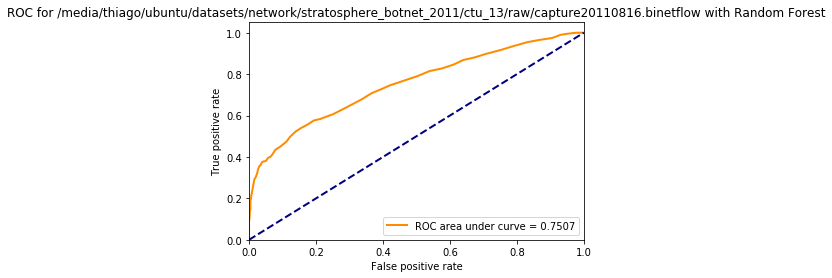

saved_data/saved_2s_16-2.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9741935483870968


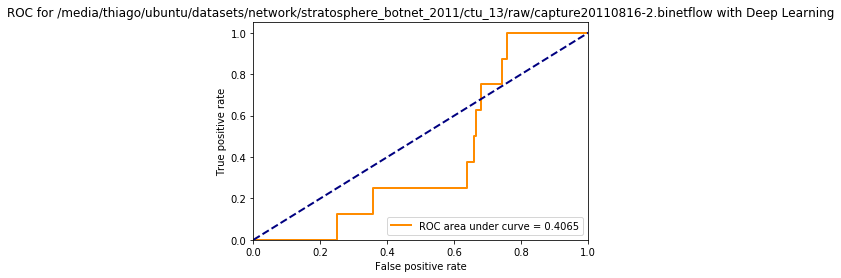

accuracy: 0.9419354838709677
precision: 0.08333333333333333
recall: 0.125
f1: 0.1


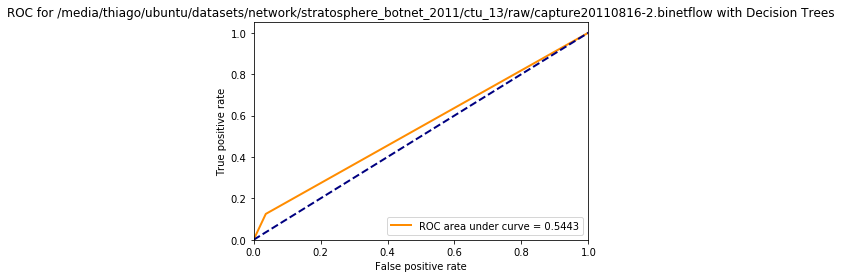

accuracy: 0.9709677419354839
precision: 0.0
recall: 0.0
f1: 0.0


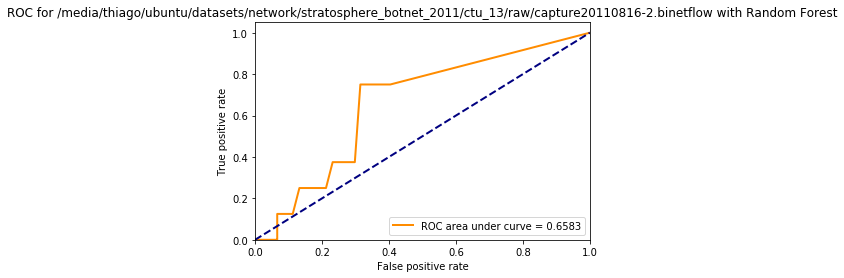

saved_data/saved_2s_16-3.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9398590984421775


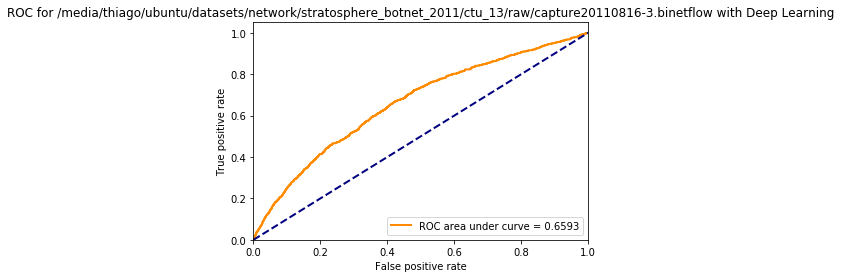

accuracy: 0.90033793458961
precision: 0.166988416988417
recall: 0.16476190476190475
f1: 0.16586768935762225


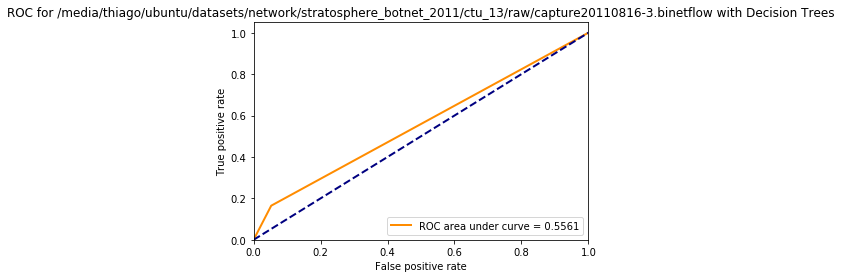

accuracy: 0.9451285869751991
precision: 0.96
recall: 0.09142857142857143
f1: 0.16695652173913045


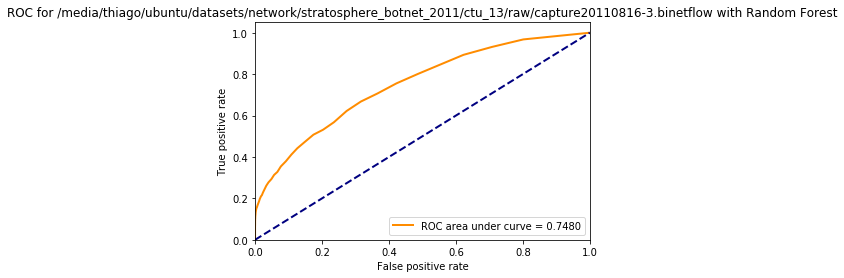

saved_data/saved_2s_17.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9050375134615269


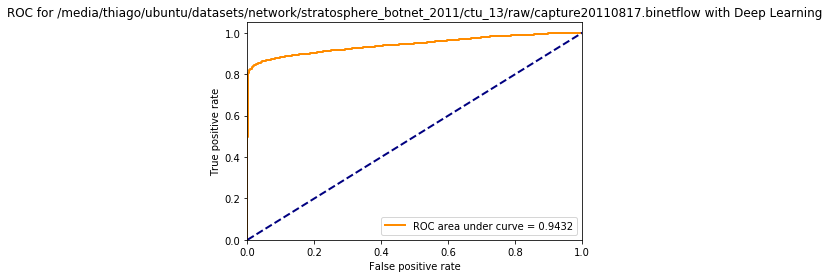

accuracy: 0.8561629153269025
precision: 0.8545981772990886
recall: 0.8657154846831725
f1: 0.8601209089013967


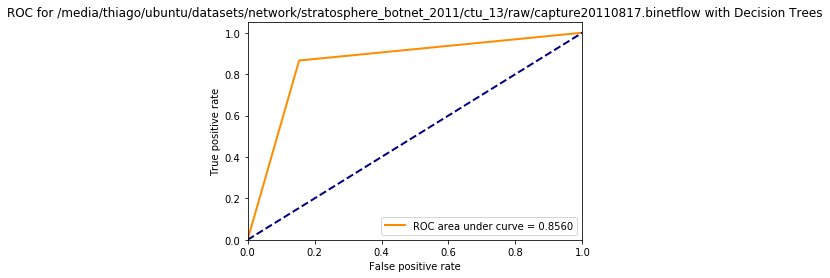

accuracy: 0.920042872454448
precision: 0.969187675070028
recall: 0.8711707931179186
f1: 0.9175690607734805


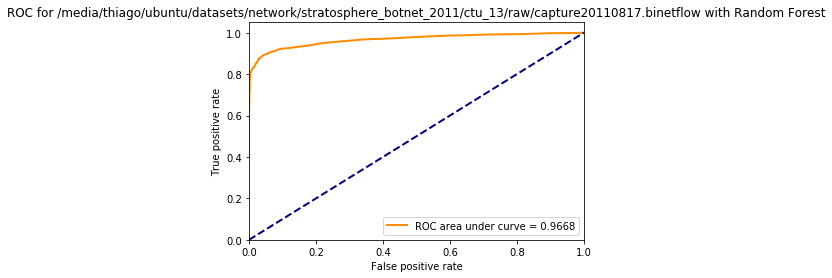

saved_data/saved_2s_18.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9676275992438563


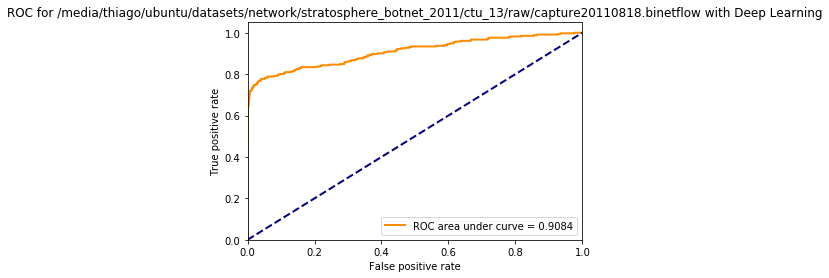

accuracy: 0.9529773156899811
precision: 0.7049689440993789
recall: 0.6858006042296072
f1: 0.6952526799387443


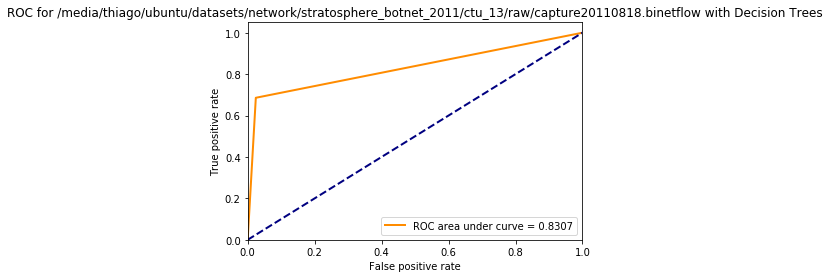

accuracy: 0.9718809073724007
precision: 0.9274193548387096
recall: 0.6948640483383686
f1: 0.7944732297063902


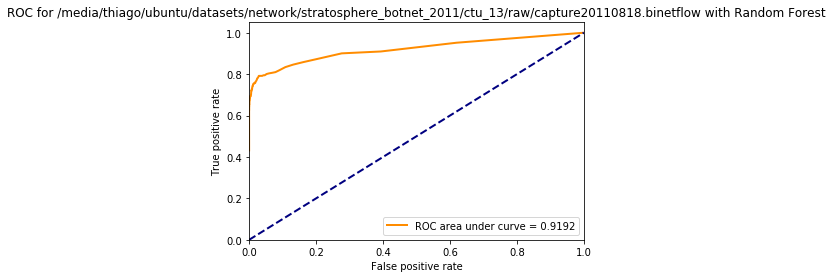

saved_data/saved_2s_18-2.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.9107142857142857


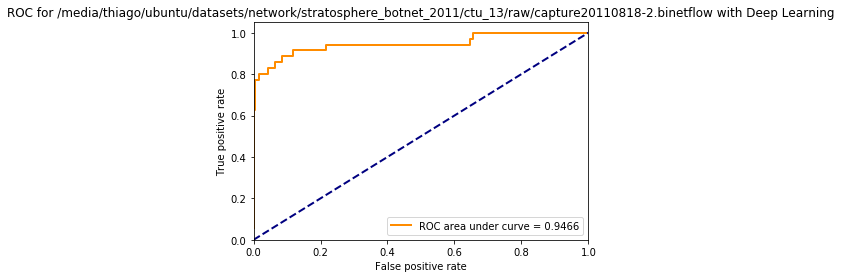

accuracy: 0.9419642857142857
precision: 0.7894736842105263
recall: 0.8571428571428571
f1: 0.8219178082191781


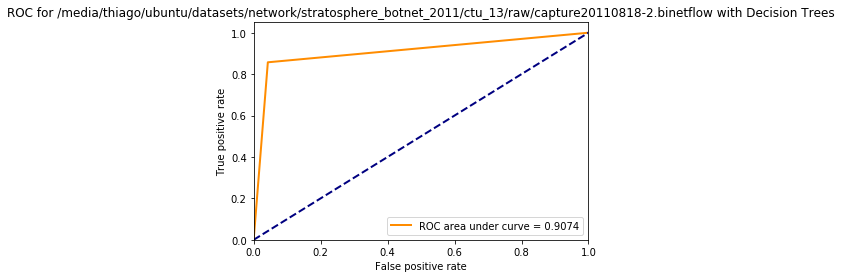

accuracy: 0.9642857142857143
precision: 0.9354838709677419
recall: 0.8285714285714286
f1: 0.8787878787878788


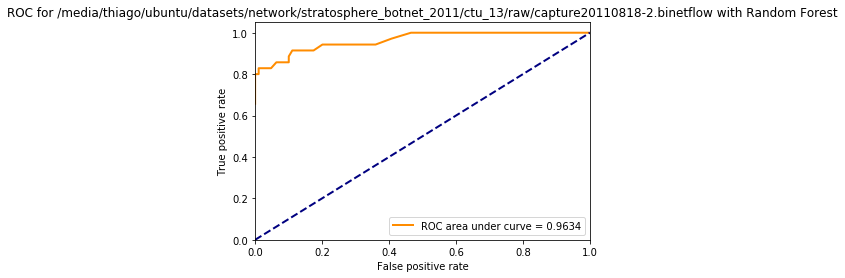

saved_data/saved_2s_19.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.8051001821493625


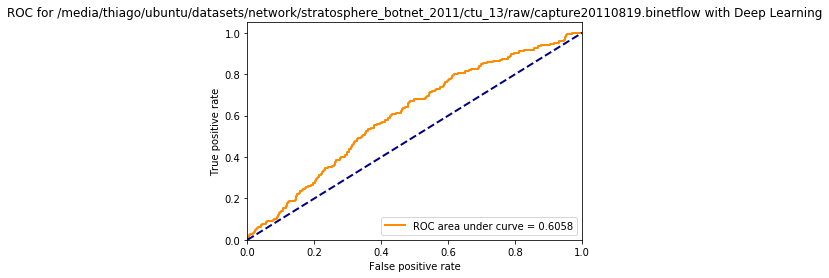

accuracy: 0.7012750455373407
precision: 0.2644628099173554
recall: 0.29906542056074764
f1: 0.2807017543859649


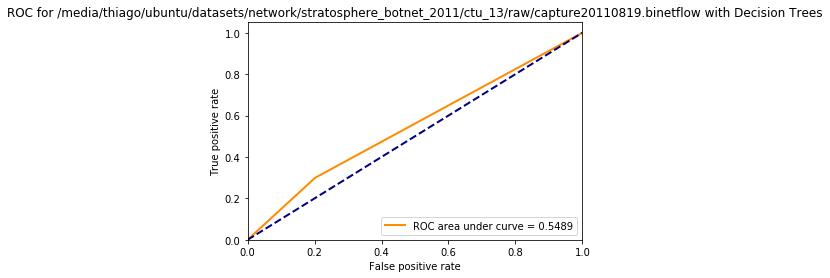

accuracy: 0.8032786885245902
precision: 0.4782608695652174
recall: 0.102803738317757
f1: 0.16923076923076924


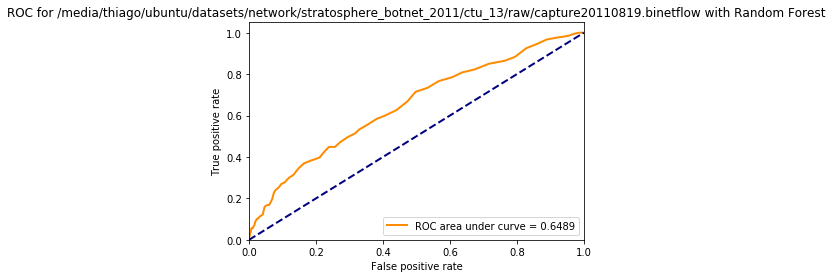

saved_data/saved_2s_15-3.pk1


/home/thiago/dev/projects/ctu-13/code/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=17)`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.4/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


0.8206068010669388


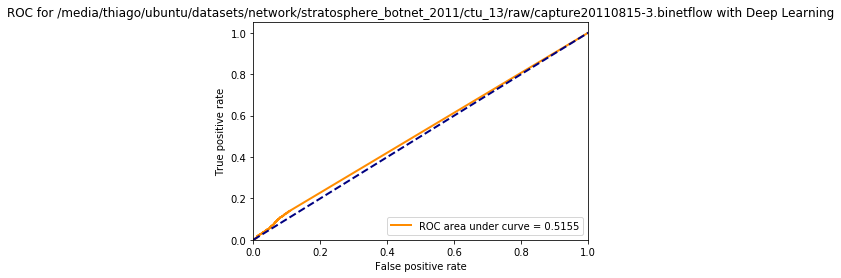

accuracy: 0.7903346229552705
precision: 0.8712364926173389
recall: 0.8736145574855252
f1: 0.872423904514104


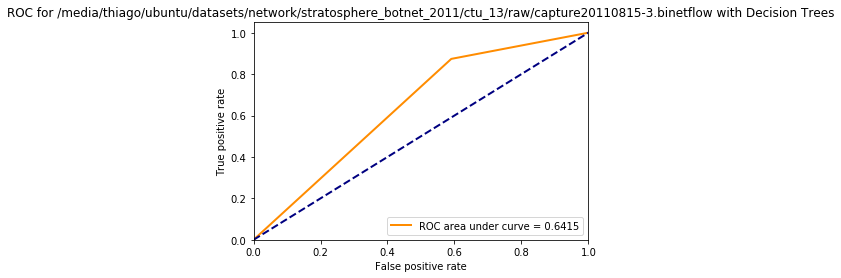

accuracy: 0.8341817688182991
precision: 0.8386100386100386
recall: 0.9880893300248139
f1: 0.9072337193848491


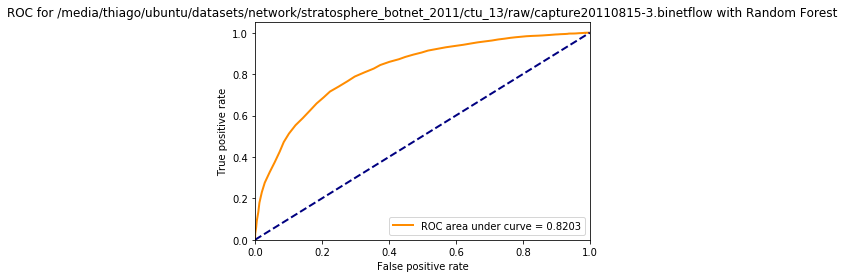

In [9]:
for binet in binet_files:
    feature, label = get_feature_labels(get_saved_data(2, binet))
    plot_roc_curve('tf', feature, label, binet)
    plot_roc_curve('dt', feature, label, binet)
    plot_roc_curve('rf', feature, label, binet)